In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install geopandas
!pip install pyshp
!pip install shapely

In [4]:
pip install plotly-geo

Note: you may need to restart the kernel to use updated packages.


In [118]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import geopandas as gpd
import json
import plotly.figure_factory as ff
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from matplotlib.ticker import PercentFormatter



pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [6]:
ky_debt_data = pd.read_excel('./data/sw-Debt-in-America-Data.xlsx', sheet_name="sw - Medical Debt - KY - County")
ky_debt_data.head()

,Unnamed: 0,Unnamed: 1,Share with debt in collections,Unnamed: 3,Unnamed: 4,Median debt in collections,Unnamed: 6,Unnamed: 7,Share with medical debt in collections,Unnamed: 9,Unnamed: 10,Median medical debt in collections,Unnamed: 12,Unnamed: 13,Nonwhite population share,Share without health insurance coverage,Unnamed: 16,Unnamed: 17,Average household income,Unnamed: 19,Unnamed: 20
0,County,State,Overall,White areas,Nonwhite areas,Overall,White areas,Nonwhite areas,Overall,White areas,Nonwhite areas,Overall,White areas,Nonwhite areas,NaN,Overall,White,Nonwhite,Overall,White,Nonwhite
1,Adair County,Kentucky,0.41,0.41,n/a**,1636,1636,n/a**,0.29,0.29,n/a**,767,767,n/a**,0.06,0.15,0.14,0.27,45573,45942,38559
2,Allen County,Kentucky,0.41,0.41,n/a**,2198,2198,n/a**,0.35,0.35,n/a**,1200,1200,n/a**,0.04,0.16,0.16,0.28,52779,51598,88920
3,Anderson County,Kentucky,0.32,0.32,n/a**,1119,1119,n/a**,0.24,0.24,n/a**,744,744,n/a**,0.06,0.09,0.09,0.06,61426,61528,58865
4,Ballard County,Kentucky,0.32,0.32,n/a**,n/a*,n/a*,n/a**,0.23,0.23,n/a**,n/a*,n/a*,n/a**,0.07,0.12,0.12,0.21,58182,59729,30831


In [7]:
ky_debt_data = ky_debt_data.iloc[1:,]
ky_debt_data.head()

,Unnamed: 0,Unnamed: 1,Share with debt in collections,Unnamed: 3,Unnamed: 4,Median debt in collections,Unnamed: 6,Unnamed: 7,Share with medical debt in collections,Unnamed: 9,Unnamed: 10,Median medical debt in collections,Unnamed: 12,Unnamed: 13,Nonwhite population share,Share without health insurance coverage,Unnamed: 16,Unnamed: 17,Average household income,Unnamed: 19,Unnamed: 20
1,Adair County,Kentucky,0.41,0.41,n/a**,1636,1636,n/a**,0.29,0.29,n/a**,767,767,n/a**,0.06,0.15,0.14,0.27,45573,45942,38559
2,Allen County,Kentucky,0.41,0.41,n/a**,2198,2198,n/a**,0.35,0.35,n/a**,1200,1200,n/a**,0.04,0.16,0.16,0.28,52779,51598,88920
3,Anderson County,Kentucky,0.32,0.32,n/a**,1119,1119,n/a**,0.24,0.24,n/a**,744,744,n/a**,0.06,0.09,0.09,0.06,61426,61528,58865
4,Ballard County,Kentucky,0.32,0.32,n/a**,n/a*,n/a*,n/a**,0.23,0.23,n/a**,n/a*,n/a*,n/a**,0.07,0.12,0.12,0.21,58182,59729,30831
5,Barren County,Kentucky,0.41,0.41,n/a**,1477,1518,n/a**,0.29,0.29,n/a**,781,776,n/a**,0.09,0.13,0.13,0.15,49555,50043,43486


In [8]:
ky_debt_data = ky_debt_data.reset_index(drop=True)
ky_debt_data.head()

,Unnamed: 0,Unnamed: 1,Share with debt in collections,Unnamed: 3,Unnamed: 4,Median debt in collections,Unnamed: 6,Unnamed: 7,Share with medical debt in collections,Unnamed: 9,Unnamed: 10,Median medical debt in collections,Unnamed: 12,Unnamed: 13,Nonwhite population share,Share without health insurance coverage,Unnamed: 16,Unnamed: 17,Average household income,Unnamed: 19,Unnamed: 20
0,Adair County,Kentucky,0.41,0.41,n/a**,1636,1636,n/a**,0.29,0.29,n/a**,767,767,n/a**,0.06,0.15,0.14,0.27,45573,45942,38559
1,Allen County,Kentucky,0.41,0.41,n/a**,2198,2198,n/a**,0.35,0.35,n/a**,1200,1200,n/a**,0.04,0.16,0.16,0.28,52779,51598,88920
2,Anderson County,Kentucky,0.32,0.32,n/a**,1119,1119,n/a**,0.24,0.24,n/a**,744,744,n/a**,0.06,0.09,0.09,0.06,61426,61528,58865
3,Ballard County,Kentucky,0.32,0.32,n/a**,n/a*,n/a*,n/a**,0.23,0.23,n/a**,n/a*,n/a*,n/a**,0.07,0.12,0.12,0.21,58182,59729,30831
4,Barren County,Kentucky,0.41,0.41,n/a**,1477,1518,n/a**,0.29,0.29,n/a**,781,776,n/a**,0.09,0.13,0.13,0.15,49555,50043,43486


In [9]:
ky_debt_data = ky_debt_data.rename(columns={'Unnamed: 0': 'County', 'Unnamed: 1': 'State', 'Share with debt in collections': 'pct_debt_in_coll', 'Median debt in collections': 'median_debt_in_coll', 'Share with medical debt in collections': 'pct_med_debt_in_coll', 'Median medical debt in collections': 'median_med_debt_in_coll', 'Nonwhite population share': 'pct_pop_nonwhite', 'Share without health insurance coverage': 'pct_overall_no_ins', 'Unnamed: 16': 'pct_white_no_ins', 'Unnamed: 17': 'pct_nonwhite_no_ins', 'Average household income': 'avg_income', 'Unnamed: 19': 'avg_income_white', 'Unnamed: 20': 'avg_income_nonwhite' })
ky_debt_data.head()

,County,State,pct_debt_in_coll,Unnamed: 3,Unnamed: 4,median_debt_in_coll,Unnamed: 6,Unnamed: 7,pct_med_debt_in_coll,Unnamed: 9,Unnamed: 10,median_med_debt_in_coll,Unnamed: 12,Unnamed: 13,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite
0,Adair County,Kentucky,0.41,0.41,n/a**,1636,1636,n/a**,0.29,0.29,n/a**,767,767,n/a**,0.06,0.15,0.14,0.27,45573,45942,38559
1,Allen County,Kentucky,0.41,0.41,n/a**,2198,2198,n/a**,0.35,0.35,n/a**,1200,1200,n/a**,0.04,0.16,0.16,0.28,52779,51598,88920
2,Anderson County,Kentucky,0.32,0.32,n/a**,1119,1119,n/a**,0.24,0.24,n/a**,744,744,n/a**,0.06,0.09,0.09,0.06,61426,61528,58865
3,Ballard County,Kentucky,0.32,0.32,n/a**,n/a*,n/a*,n/a**,0.23,0.23,n/a**,n/a*,n/a*,n/a**,0.07,0.12,0.12,0.21,58182,59729,30831
4,Barren County,Kentucky,0.41,0.41,n/a**,1477,1518,n/a**,0.29,0.29,n/a**,781,776,n/a**,0.09,0.13,0.13,0.15,49555,50043,43486


In [10]:
ky_debt_data = ky_debt_data[ky_debt_data.columns.drop(list(ky_debt_data.filter(regex='Unnamed:')))]
ky_debt_data.head()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite
0,Adair County,Kentucky,0.41,1636,0.29,767,0.06,0.15,0.14,0.27,45573,45942,38559
1,Allen County,Kentucky,0.41,2198,0.35,1200,0.04,0.16,0.16,0.28,52779,51598,88920
2,Anderson County,Kentucky,0.32,1119,0.24,744,0.06,0.09,0.09,0.06,61426,61528,58865
3,Ballard County,Kentucky,0.32,n/a*,0.23,n/a*,0.07,0.12,0.12,0.21,58182,59729,30831
4,Barren County,Kentucky,0.41,1477,0.29,781,0.09,0.13,0.13,0.15,49555,50043,43486


In [11]:
ky_debt_data.County = ky_debt_data.County.str[:-7]

In [12]:
ky_debt_data.head()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite
0,Adair,Kentucky,0.41,1636,0.29,767,0.06,0.15,0.14,0.27,45573,45942,38559
1,Allen,Kentucky,0.41,2198,0.35,1200,0.04,0.16,0.16,0.28,52779,51598,88920
2,Anderson,Kentucky,0.32,1119,0.24,744,0.06,0.09,0.09,0.06,61426,61528,58865
3,Ballard,Kentucky,0.32,n/a*,0.23,n/a*,0.07,0.12,0.12,0.21,58182,59729,30831
4,Barren,Kentucky,0.41,1477,0.29,781,0.09,0.13,0.13,0.15,49555,50043,43486


Population

In [13]:
ky_county_pop_df = pd.read_excel('./data/Kentucky-counties.xls')
ky_county_pop_df

,"Annual Estimates of the Resident Population for Kentucky, ADDs, and Counties:",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"April 1, 2010 to July 1, 2018",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Population Change,NaN,NaN,NaN
2,NaN,2010-04-01 00:00:00,Population Estimates (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Census-2018,NaN,2017-2018,NaN
3,NaN,Census,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,Number,Percent,Number,Percent
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kentucky,4339367,4347948,4368505.0,4383673.0,4399121.0,4410415.0,4422057.0,4436113.0,4454189.0,4468402.0,129035,3,14213,0.3
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ADDs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BarrenRiver,284195,284940,286732.0,288623.0,291467.0,293377.0,296666.0,299547.0,303348.0,306780.0,22585,7.9,3432,1.1
9,Big Sandy,154093,154612,154158.0,152960.0,151427.0,149709.0,147541.0,144889.0,141728.0,140318.0,-13775,-8.9,-1410,-1


In [14]:
ky_county_pop_df = ky_county_pop_df.iloc[25:145,:]
ky_county_pop_df



,"Annual Estimates of the Resident Population for Kentucky, ADDs, and Counties:",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
25,Adair,18656,18761,18991.0,18937.0,19126.0,19265.0,19168.0,19264.0,19294.0,19215.0,559,3,-79,-0.4
26,Allen,19956,20048,20190.0,20250.0,20333.0,20510.0,20678.0,20738.0,20921.0,21122.0,1166,5.8,201,1
27,Anderson,21421,21457,21551.0,21686.0,21737.0,21853.0,21891.0,22146.0,22518.0,22663.0,1242,5.8,145,0.6
28,Ballard,8249,8260,8269.0,8287.0,8254.0,8189.0,8216.0,8045.0,8021.0,7979.0,-270,-3.3,-42,-0.5
29,Barren,42173,42123,42329.0,42620.0,42952.0,43048.0,43566.0,43794.0,43815.0,44176.0,2003,4.7,361,0.8
30,Bath,11591,11616,11714.0,11781.0,11974.0,12131.0,12201.0,12245.0,12378.0,12383.0,792,6.8,5,0
31,Bell,28691,28709,28657.0,28296.0,28047.0,27847.0,27391.0,27231.0,26904.0,26569.0,-2122,-7.4,-335,-1.2
32,Boone,118811,119379,121545.0,123074.0,124680.0,126330.0,127818.0,129185.0,130611.0,131533.0,12722,10.7,922,0.7
33,Bourbon,19985,19967,20055.0,20061.0,20038.0,20074.0,20182.0,20147.0,20132.0,20184.0,199,1,52,0.3
34,Boyd,49542,49606,49419.0,49255.0,48917.0,48840.0,48506.0,48109.0,47759.0,47240.0,-2302,-4.6,-519,-1.1


In [15]:
ky_county_pop_df = ky_county_pop_df.rename(columns={'Annual Estimates of the Resident Population for Kentucky, ADDs, and Counties:': 'County', 'Unnamed: 9': 'pop_2017'})
ky_county_pop_df.head()

,County,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,pop_2017,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
25,Adair,18656,18761,18991.0,18937.0,19126.0,19265.0,19168.0,19264.0,19294.0,19215.0,559,3,-79,-0.4
26,Allen,19956,20048,20190.0,20250.0,20333.0,20510.0,20678.0,20738.0,20921.0,21122.0,1166,5.8,201,1
27,Anderson,21421,21457,21551.0,21686.0,21737.0,21853.0,21891.0,22146.0,22518.0,22663.0,1242,5.8,145,0.6
28,Ballard,8249,8260,8269.0,8287.0,8254.0,8189.0,8216.0,8045.0,8021.0,7979.0,-270,-3.3,-42,-0.5
29,Barren,42173,42123,42329.0,42620.0,42952.0,43048.0,43566.0,43794.0,43815.0,44176.0,2003,4.7,361,0.8


In [16]:
ky_county_pop_df = ky_county_pop_df[ky_county_pop_df.columns.drop(list(ky_county_pop_df.filter(regex='Unnamed:')))]
ky_county_pop_df = ky_county_pop_df.reset_index(drop=True)
ky_county_pop_df

,County,pop_2017
0,Adair,19294.0
1,Allen,20921.0
2,Anderson,22518.0
3,Ballard,8021.0
4,Barren,43815.0
5,Bath,12378.0
6,Bell,26904.0
7,Boone,130611.0
8,Bourbon,20132.0
9,Boyd,47759.0


In [17]:
ky_debt_pop_df = pd.merge(ky_debt_data,ky_county_pop_df, on=['County'], how ='inner')
ky_debt_pop_df

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636,0.29,767,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198,0.35,1200,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119,0.24,744,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,n/a*,0.23,n/a*,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477,0.29,781,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012,0.44,466,0.04,0.13,0.13,0.2,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030,0.37,545,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410,0.13,390,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248,0.32,592,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708,0.43,790,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


In [18]:
ky_debt_pop_df.tail()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
115,Wayne,Kentucky,0.45,1181,0.34,449,0.06,0.12,0.12,0.14,37361,38327,23224,20621.0
116,Webster,Kentucky,0.35,1398,0.25,603,0.11,0.12,0.12,0.13,51036,51641,43662,13071.0
117,Whitley,Kentucky,0.5,1457,0.34,809,0.04,0.13,0.13,0.2,44278,44328,42161,36129.0
118,Wolfe,Kentucky,0.46,1497,0.26,n/a*,0.02,0.12,0.12,0.27,32719,33046,11829,7245.0
119,Woodford,Kentucky,0.27,1139,0.19,447,0.14,0.09,0.07,0.24,76590,79834,48537,26396.0


In [19]:
ky_debt_pop_df = ky_debt_pop_df.replace('n/a*', np.nan)
ky_debt_pop_df

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,NaN,0.23,NaN,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0


In [20]:
ky_debt_pop_df.describe()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
count,119.000000,111.000000,119.000000,94.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.418151,1344.054054,0.295042,663.872340,0.079250,0.118500,0.112250,0.182750,52205.508333,52947.533333,44823.725000,37115.616667
std,0.082277,364.403269,0.078609,223.145655,0.061167,0.031878,0.033618,0.106794,12223.566846,12781.744995,22819.181598,77775.606185
min,0.220000,713.000000,0.130000,284.000000,0.000000,0.040000,0.040000,0.000000,29120.000000,29257.000000,10089.000000,2132.000000
25%,0.365000,1127.000000,0.240000,509.250000,0.040000,0.110000,0.090000,0.130000,43633.000000,44251.000000,31695.250000,12236.000000
50%,0.410000,1295.000000,0.290000,623.000000,0.060000,0.120000,0.115000,0.175000,50190.500000,51611.000000,41675.500000,19028.000000
75%,0.480000,1490.500000,0.340000,783.250000,0.110000,0.140000,0.132500,0.220000,58200.250000,59041.750000,50468.500000,35603.250000
max,0.610000,2905.000000,0.520000,1644.000000,0.330000,0.200000,0.200000,0.530000,106471.000000,106428.000000,204448.000000,770377.000000


In [21]:
ky_debt_pop_df.median_debt_in_coll = ky_debt_pop_df.median_debt_in_coll.replace(np.nan, 1295)  #replacing all NaN values in median debt collections with the median medical debt in collections for all counties. 
ky_debt_pop_df.head()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,1295.0,0.23,NaN,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0


In [22]:
ky_debt_pop_df.median_med_debt_in_coll = ky_debt_pop_df.median_med_debt_in_coll.replace(np.nan, 623)  #replacing all NaN values in median debt collections with the median medical debt in collections for all counties. 
ky_debt_pop_df.head()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0


Which county had the highest percent of medical debts in collections?

In [145]:
highest_pct_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.pct_med_debt_in_coll != 'n/a*']
highest_pct_med_debt_coll = highest_pct_med_debt_coll.sort_values(by='pct_med_debt_in_coll', ascending=False).head(10)
highest_pct_med_debt_coll.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Carter,Kentucky,0.58,1422.0,0.52,882.0,0.03,0.15,0.15,0.16,47504,47734,37224,27193.0
1,Johnson,Kentucky,0.55,1184.0,0.46,757.0,0.02,0.11,0.11,0.01,46867,46463,68038,22571.0
2,Elliott,Kentucky,0.51,1295.0,0.45,623.0,0.03,0.12,0.12,0.00,39390,39458,26100,7508.0
3,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0
4,Floyd,Kentucky,0.56,1138.0,0.43,533.0,0.03,0.14,0.14,0.29,44358,44020,63962,36261.0
5,Menifee,Kentucky,0.55,1488.0,0.43,623.0,0.04,0.14,0.12,0.52,41120,41613,10089,6466.0
6,Cumberland,Kentucky,0.46,1087.0,0.43,580.0,0.05,0.18,0.18,0.16,41349,41631,34492,6696.0
7,Nicholas,Kentucky,0.58,1691.0,0.43,623.0,0.04,0.16,0.16,0.00,48510,49383,16041,7137.0
8,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0
9,Greenup,Kentucky,0.49,1681.0,0.43,875.0,0.04,0.13,0.12,0.17,59689,59434,67530,35491.0


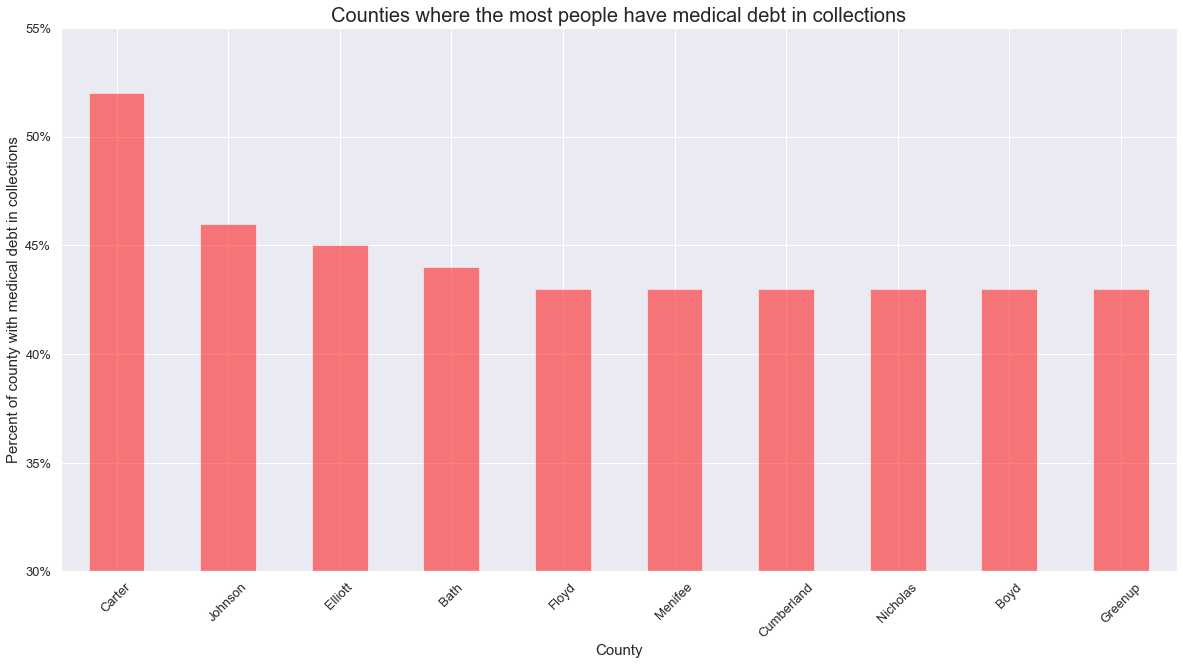

In [150]:
highest_pct_med_debt_coll.plot(kind='bar', x='County', y='pct_med_debt_in_coll', color='red', alpha=0.5, figsize=(20,10))
plt.xlabel('County', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.yticks([.30,.35,.40,.45,.50, .55],["30%","35%","40%","45%","50%", "55%"], fontsize=13)
plt.ylim(.3,.55)
plt.title('Counties where the most people have medical debt in collections', fontsize= 20)
plt.legend().remove()
plt.show()

Which county had the lowest percent of medical debts in collections?

In [110]:
lowest_pct_med_debt_coll = ky_debt_pop_df.sort_values(by='pct_med_debt_in_coll', ascending=True).head(10)
lowest_pct_med_debt_coll.reset_index(drop=True)

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Marshall,Kentucky,0.22,1232.0,0.13,480.0,0.03,0.08,0.08,0.18,56956,57443,31082,31311.0
1,Carlisle,Kentucky,0.24,1295.0,0.13,623.0,0.05,0.14,0.12,0.53,51628,51624,51765,4828.0
2,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
3,Kenton,Kentucky,0.32,1238.0,0.15,495.0,0.11,0.06,0.04,0.15,70839,72990,47309,165410.0
4,Campbell,Kentucky,0.32,1099.0,0.15,519.0,0.07,0.07,0.06,0.16,74290,75928,45680,92547.0
5,Calloway,Kentucky,0.28,922.0,0.16,680.0,0.10,0.11,0.10,0.20,50310,52599,27634,38865.0
6,Hickman,Kentucky,0.28,1295.0,0.18,623.0,0.12,0.14,0.14,0.13,44888,46004,33568,4523.0
7,McCracken,Kentucky,0.37,1111.0,0.18,550.0,0.16,0.05,0.05,0.05,87060,88321,79664,65397.0
8,Oldham,Kentucky,0.25,1390.0,0.18,634.0,0.11,0.05,0.04,0.15,106471,106428,106964,66489.0
9,Livingston,Kentucky,0.38,1342.0,0.19,623.0,0.04,0.09,0.09,0.11,55685,55159,76568,9264.0


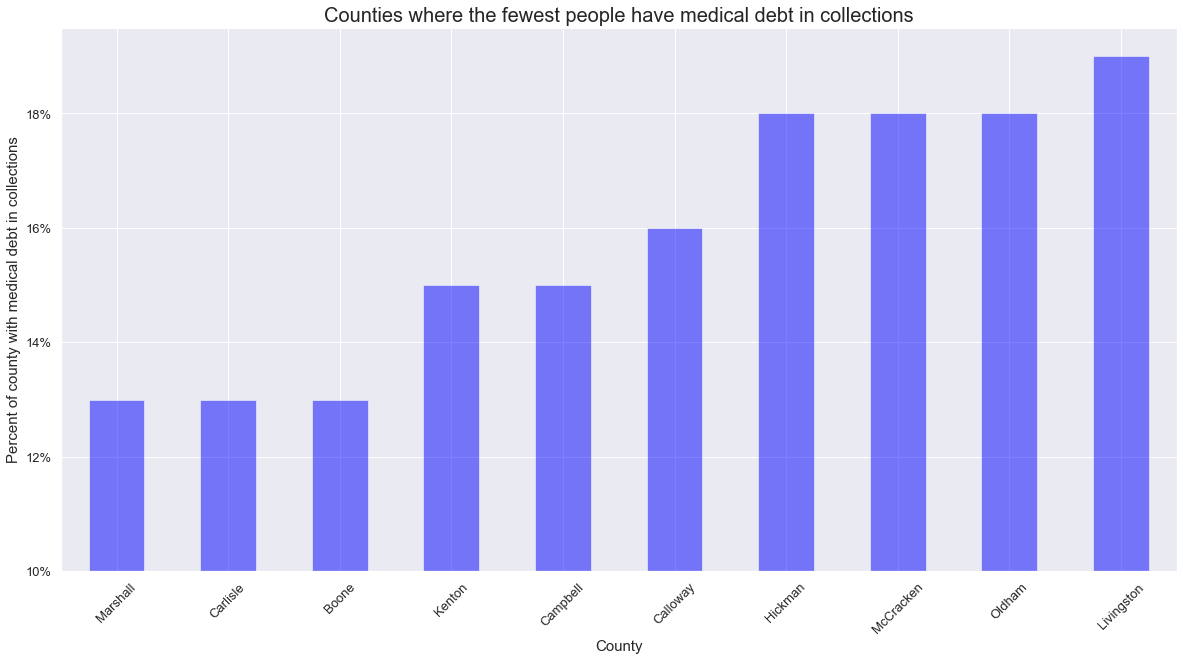

In [144]:
lowest_pct_med_debt_coll.plot(kind='bar', x='County', y='pct_med_debt_in_coll', color='blue', alpha=0.5, figsize=(20,10))
plt.xlabel('County', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.yticks([.10,.12,.14,.16,.18],["10%","12%","14%","16%","18%"], fontsize=13)
plt.ylim(.1,.195)
plt.title('Counties where the fewest people have medical debt in collections', fontsize= 20)
plt.legend().remove()
plt.show()


Which county had the highest median medical debt amount in collections?

In [114]:
highest_median_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.median_med_debt_in_coll != 'n/a*']
highest_median_med_debt_coll = highest_median_med_debt_coll.sort_values(by='median_med_debt_in_coll', ascending=False).head(10)
highest_median_med_debt_coll.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Union,Kentucky,0.37,2670.0,0.27,1644.0,0.17,0.14,0.10,0.33,51971,54102,29859,14640.0
1,Henderson,Kentucky,0.39,1845.0,0.28,1316.0,0.13,0.11,0.10,0.17,54572,56395,38329,45989.0
2,Simpson,Kentucky,0.43,1700.0,0.33,1249.0,0.15,0.13,0.11,0.22,49851,52784,31009,18105.0
3,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0
4,Washington,Kentucky,0.39,1249.0,0.30,991.0,0.12,0.11,0.09,0.21,49984,51568,34939,11939.0
5,Rockcastle,Kentucky,0.52,1564.0,0.43,963.0,0.02,0.11,0.11,0.11,42287,42499,31704,16757.0
6,Harrison,Kentucky,0.36,2007.0,0.28,945.0,0.06,0.15,0.14,0.31,50510,51707,26113,18730.0
7,Mercer,Kentucky,0.36,1594.0,0.27,923.0,0.08,0.11,0.10,0.19,54503,55269,41636,21588.0
8,Powell,Kentucky,0.54,1449.0,0.34,923.0,0.03,0.13,0.13,0.14,43275,43739,28999,12321.0
9,Christian,Kentucky,0.49,1542.0,0.34,912.0,0.33,0.08,0.07,0.09,45909,48824,38634,71252.0


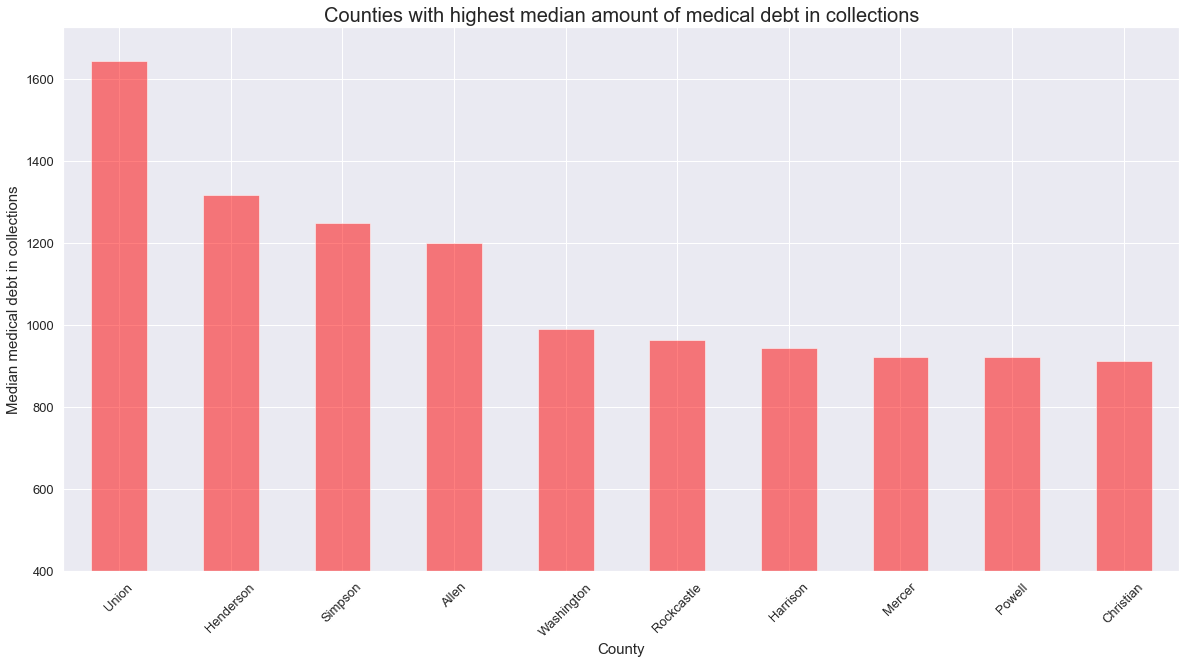

In [154]:
highest_median_med_debt_coll.plot(kind='bar', x='County', y='median_med_debt_in_coll', color='red', alpha=0.5, figsize=(20,10))
plt.xlabel('County', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel('Median medical debt in collections', fontsize=15)
plt.ylim(400,)
plt.yticks(fontsize=13)
plt.title('Counties with highest median amount of medical debt in collections', fontsize= 20)
plt.legend().remove()
plt.show()

Which county had the highest median medical debt amount in collections?

In [155]:
lowest_median_med_debt_coll = ky_debt_pop_df[ky_debt_pop_df.median_med_debt_in_coll != 'n/a*']
lowest_median_med_debt_coll = lowest_median_med_debt_coll.sort_values(by='median_med_debt_in_coll', ascending=True).head(10)
lowest_median_med_debt_coll.reset_index(drop=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
0,Spencer,Kentucky,0.26,713.0,0.19,284.0,0.05,0.07,0.06,0.22,73839,74452,58976,18471.0
1,Boyle,Kentucky,0.40,1208.0,0.23,321.0,0.14,0.11,0.09,0.18,56462,57554,47549,29958.0
2,Monroe,Kentucky,0.50,857.0,0.37,344.0,0.06,0.11,0.09,0.30,42684,43048,35863,10611.0
3,Hopkins,Kentucky,0.34,1135.0,0.21,363.0,0.11,0.12,0.11,0.21,54317,55620,40128,45369.0
4,Morgan,Kentucky,0.47,1761.0,0.34,369.0,0.06,0.11,0.11,0.10,43026,43024,43087,13211.0
5,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0
6,Grant,Kentucky,0.40,1169.0,0.24,406.0,0.06,0.11,0.11,0.17,55470,55160,63713,25000.0
7,Lewis,Kentucky,0.50,1312.0,0.38,427.0,0.02,0.15,0.15,0.09,41755,41942,24929,13358.0
8,Clay,Kentucky,0.49,1055.0,0.31,430.0,0.07,0.11,0.11,0.10,34745,34795,31669,20273.0
9,Pike,Kentucky,0.47,1337.0,0.35,433.0,0.03,0.06,0.06,0.22,50797,46338,204448,58862.0


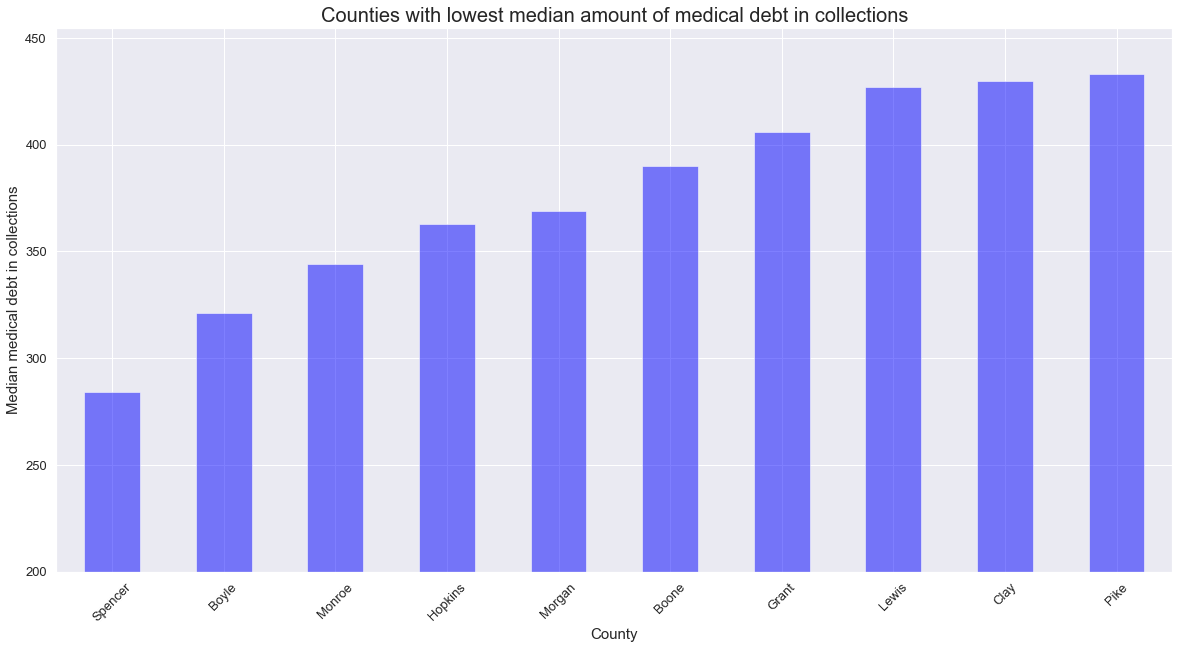

In [157]:
lowest_median_med_debt_coll.plot(kind='bar', x='County', y='median_med_debt_in_coll', color='blue', alpha=0.5, figsize=(20,10))
plt.xlabel('County', fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel('Median medical debt in collections', fontsize=15)
plt.ylim(200,)
plt.yticks(fontsize=13)
plt.title('Counties with lowest median amount of medical debt in collections', fontsize= 20)
plt.legend().remove()
plt.show()

In [31]:
ky_debt_pop_drop_median_na_df = ky_debt_pop_df[ky_debt_pop_df.median_med_debt_in_coll != 'n/a*']

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [32]:
ky_debt_pop_df.corr()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017
pct_debt_in_coll,1.000000,0.029368,0.851569,0.067054,-0.221773,0.410407,0.427120,-0.002681,-0.594502,-0.589172,-0.193039,-0.123937
median_debt_in_coll,0.029368,1.000000,0.142806,0.550724,0.085427,0.075616,0.046906,-0.005924,0.034168,0.031139,0.023437,0.000754
pct_med_debt_in_coll,0.851569,0.142806,1.000000,0.165521,-0.232405,0.410405,0.426256,0.002778,-0.477829,-0.475491,-0.173591,-0.135067
median_med_debt_in_coll,0.067054,0.550724,0.165521,1.000000,0.217339,0.075282,0.006534,0.096891,-0.031087,-0.007349,-0.121843,0.036312
pct_pop_nonwhite,-0.221773,0.085427,-0.232405,0.217339,1.000000,-0.306134,-0.404150,-0.069149,0.410420,0.478296,0.035055,0.532424
pct_overall_no_ins,0.410407,0.075616,0.410405,0.075282,-0.306134,1.000000,0.966078,0.284592,-0.586242,-0.586031,-0.348389,-0.428999
pct_white_no_ins,0.427120,0.046906,0.426256,0.006534,-0.404150,0.966078,1.000000,0.128868,-0.633154,-0.641367,-0.324650,-0.446232
pct_nonwhite_no_ins,-0.002681,-0.005924,0.002778,0.096891,-0.069149,0.284592,0.128868,1.000000,-0.082644,-0.084072,-0.017926,-0.157560
avg_income,-0.594502,0.034168,-0.477829,-0.031087,0.410420,-0.586242,-0.633154,-0.082644,1.000000,0.994229,0.454330,0.375411
avg_income_white,-0.589172,0.031139,-0.475491,-0.007349,0.478296,-0.586031,-0.641367,-0.084072,0.994229,1.000000,0.393820,0.425875


In [33]:
shapefile = gpd.read_file('./data/County_Polygon_1z.shp')
shapefile.head()

,OBJECTID_1,OBJECTID,NAME,NAME2,ADDNAME,SEAT,SEAT2,POP70,POP80,POP90,POP00,CH70_80,CH80_90,CH90_00,POP70SQ,POP80SQ,POP90SQ,POP00SQ,CHSQ70_80,CHSQ80_90,CHSQ90_00,MILES_SQ,FIPS_NO,FIPS_TXT,SMIS,SP_ZONE,REGION,KYGEONET,SHAPE_area,SHAPE_len,geometry
0,8,128,GREENUP,Greenup,FIVCO,Greenup,GREENUP,33192,39132,36742,36891,17.8958,-6.1075,0.4055,93.6492,110.4085,103.6653,104.0857,17.8958,-6.1075,0.4055,354.428925,89,089,45,NORTH,NORTHEAST REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,9.880911e+09,519983.004395,"POLYGON ((5696927.000649408 4163203.493118197,..."
1,9,129,MASON,Mason,BUFFALO TRACE,Maysville,MAYSVILLE,17273,17760,16666,16800,2.8194,-6.1599,0.8040,70.1020,72.0785,67.6385,68.1824,2.8194,-6.1599,0.8041,246.397779,161,161,81,NORTH,NORTHEAST REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,6.869176e+09,353399.657348,"POLYGON ((5447610.998016492 4172645.258631453,..."
2,10,130,CARROLL,Carroll,NORTHERN KENTUCKY,Carrollton,CARROLLTON,8523,9270,9292,10155,8.7645,0.2373,9.2875,62.0687,67.5087,67.6690,73.9538,8.7644,0.2374,9.2875,137.315433,41,041,21,NORTH,NORTHERN KENTUCKY REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,3.828135e+09,329873.908860,"POLYGON ((5040176.500135705 4156066.247712791,..."
3,11,131,LEWIS,Lewis,BUFFALO TRACE,Vanceburg,VANCEBURG,12355,14545,13029,14092,17.7256,-10.4228,8.1587,24.9418,29.3629,26.3024,28.4484,17.7256,-10.4230,8.1589,495.352760,135,135,68,NORTH,NORTHEAST REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,1.380964e+10,750422.834077,"POLYGON ((5692349.492746815 4154522.004764766,..."
4,12,132,TRIMBLE,Trimble,KIPDA,Bedford,BEDFORD,5349,6253,6090,8125,16.9003,-2.6067,33.4154,34.2418,40.0288,38.9854,52.0125,16.9003,-2.6066,33.4153,156.212291,223,223,112,NORTH,GREATER LOUISVILLE REGION,7B6407538C-2334-4BC6-B445-E08B2E267686,4.354949e+09,296645.732761,"POLYGON ((5040176.500135705 4156066.247712791,..."


In [34]:
shapefile_small = shapefile[['NAME2', 'geometry']]

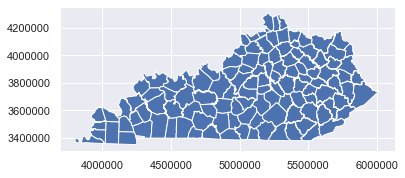

In [35]:
shapefile_small.plot()

In [36]:
shapefile_small = shapefile_small.rename(columns={'NAME2': 'County'})
shapefile_small.head()

,County,geometry
0,Greenup,"POLYGON ((5696927.000649408 4163203.493118197,..."
1,Mason,"POLYGON ((5447610.998016492 4172645.258631453,..."
2,Carroll,"POLYGON ((5040176.500135705 4156066.247712791,..."
3,Lewis,"POLYGON ((5692349.492746815 4154522.004764766,..."
4,Trimble,"POLYGON ((5040176.500135705 4156066.247712791,..."


In [37]:
ky_debt_pop_shape_df = pd.merge(ky_debt_pop_df,shapefile_small, on=['County'], how ='inner')
ky_debt_pop_shape_df.head()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017,geometry
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0,"POLYGON ((5091332.504490286 3637133.24552922, ..."
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0,"POLYGON ((4807035.996361256 3493719.995950386,..."
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0,"POLYGON ((5130153.999390408 3935494.758557647,..."
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0,"POLYGON ((4025485.747941986 3521587.750047788,..."
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0,"POLYGON ((4922934.002443656 3585414.001578286,..."


In [38]:
ky_bankruptcy_data = pd.read_excel('./data/ky_bankruptcy.xlsx', sheet_name="ky - bankruptcy -county")
ky_bankruptcy_data.head()

,County,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
0,ADAIR,58,48,10
1,ALLEN,73,55,18
2,ANDERSON,98,49,49
3,BALLARD,24,14,10
4,BARREN,139,98,41


In [39]:
ky_bankruptcy_data['County'] = ky_bankruptcy_data['County'].str.capitalize()
ky_bankruptcy_data.head()

,County,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
0,Adair,58,48,10
1,Allen,73,55,18
2,Anderson,98,49,49
3,Ballard,24,14,10
4,Barren,139,98,41


In [40]:
ky_debt_pop_shape_bankruptcy_df = pd.merge(ky_debt_pop_shape_df,ky_bankruptcy_data, on=['County'], how ='inner')
ky_debt_pop_shape_bankruptcy_df.head()

,County,State,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017,geometry,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0,"POLYGON ((5091332.504490286 3637133.24552922, ...",58,48,10
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0,"POLYGON ((4807035.996361256 3493719.995950386,...",73,55,18
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0,"POLYGON ((5130153.999390408 3935494.758557647,...",98,49,49
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0,"POLYGON ((4025485.747941986 3521587.750047788,...",24,14,10
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0,"POLYGON ((4922934.002443656 3585414.001578286,...",139,98,41


In [41]:
ky_debt_pop_shape_bankruptcy_df.corr()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
pct_debt_in_coll,1.000000,0.026881,0.855878,0.055384,-0.224063,0.409448,0.427232,-0.011259,-0.596804,-0.590314,-0.179884,-0.121830,-0.095095,-0.086760,-0.103394
median_debt_in_coll,0.026881,1.000000,0.136102,0.552063,0.094966,0.066340,0.038000,-0.013062,0.052841,0.049038,0.033546,0.003458,0.000295,0.006066,-0.006705
pct_med_debt_in_coll,0.855878,0.136102,1.000000,0.158799,-0.220822,0.395969,0.413797,-0.013939,-0.465259,-0.462672,-0.155389,-0.131198,-0.116162,-0.110716,-0.120570
median_med_debt_in_coll,0.055384,0.552063,0.158799,1.000000,0.222855,0.066346,-0.001646,0.090453,-0.002890,0.021464,-0.108166,0.039815,0.033633,0.037173,0.028672
pct_pop_nonwhite,-0.224063,0.094966,-0.220822,0.222855,1.000000,-0.294409,-0.394996,-0.056580,0.408608,0.480251,0.019408,0.533046,0.486210,0.490307,0.471888
pct_overall_no_ins,0.409448,0.066340,0.395969,0.066346,-0.294409,1.000000,0.965471,0.269753,-0.574271,-0.574152,-0.335536,-0.433959,-0.400255,-0.417585,-0.371621
pct_white_no_ins,0.427232,0.038000,0.413797,-0.001646,-0.394996,0.965471,1.000000,0.112198,-0.630567,-0.638979,-0.313156,-0.449330,-0.408468,-0.425390,-0.380176
pct_nonwhite_no_ins,-0.011259,-0.013062,-0.013939,0.090453,-0.056580,0.269753,0.112198,1.000000,-0.051705,-0.054074,0.000894,-0.154296,-0.153709,-0.157863,-0.145727
avg_income,-0.596804,0.052841,-0.465259,-0.002890,0.408608,-0.574271,-0.630567,-0.051705,1.000000,0.993660,0.427263,0.382588,0.322130,0.326003,0.311294
avg_income_white,-0.590314,0.049038,-0.462672,0.021464,0.480251,-0.574152,-0.638979,-0.054074,0.993660,1.000000,0.362890,0.434892,0.370435,0.374246,0.358737


## Overall data: Keeping the columns we need

In [42]:
ky_debt_pop_shape_bankruptcy_df_small =ky_debt_pop_shape_bankruptcy_df[['County','pct_debt_in_coll', 'median_debt_in_coll', 'pct_med_debt_in_coll',
                                 'median_med_debt_in_coll', 'pct_overall_no_ins', 'avg_income', 'pop_2017','all chapters_non_business', 'non_business_chapter_7', 'non_business_chapter_13'  ]]


ky_debt_pop_shape_bankruptcy_df_small.head()

,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13
0,Adair,0.41,1636.0,0.29,767.0,0.15,45573,19294.0,58,48,10
1,Allen,0.41,2198.0,0.35,1200.0,0.16,52779,20921.0,73,55,18
2,Anderson,0.32,1119.0,0.24,744.0,0.09,61426,22518.0,98,49,49
3,Ballard,0.32,1295.0,0.23,623.0,0.12,58182,8021.0,24,14,10
4,Barren,0.41,1477.0,0.29,781.0,0.13,49555,43815.0,139,98,41


### overall data: add a column for the percent of county with insurance

In [43]:
ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'] = 1- (ky_debt_pop_shape_bankruptcy_df_small['pct_overall_no_ins'])
ky_debt_pop_shape_bankruptcy_df_small.head()

,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins
0,Adair,0.41,1636.0,0.29,767.0,0.15,45573,19294.0,58,48,10,0.85
1,Allen,0.41,2198.0,0.35,1200.0,0.16,52779,20921.0,73,55,18,0.84
2,Anderson,0.32,1119.0,0.24,744.0,0.09,61426,22518.0,98,49,49,0.91
3,Ballard,0.32,1295.0,0.23,623.0,0.12,58182,8021.0,24,14,10,0.88
4,Barren,0.41,1477.0,0.29,781.0,0.13,49555,43815.0,139,98,41,0.87


### overall data:  add a column for the percent of bankruptcies in county

In [44]:
ky_debt_pop_shape_bankruptcy_df_small['pct_of_bankruptcies'] = ky_debt_pop_shape_bankruptcy_df_small['all chapters_non_business']/ky_debt_pop_shape_bankruptcy_df_small['pop_2017']
ky_debt_pop_shape_bankruptcy_df_small.head()

,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
0,Adair,0.41,1636.0,0.29,767.0,0.15,45573,19294.0,58,48,10,0.85,0.003006
1,Allen,0.41,2198.0,0.35,1200.0,0.16,52779,20921.0,73,55,18,0.84,0.003489
2,Anderson,0.32,1119.0,0.24,744.0,0.09,61426,22518.0,98,49,49,0.91,0.004352
3,Ballard,0.32,1295.0,0.23,623.0,0.12,58182,8021.0,24,14,10,0.88,0.002992
4,Barren,0.41,1477.0,0.29,781.0,0.13,49555,43815.0,139,98,41,0.87,0.003172


### overall data: a look at correlation matrix for moderate pos and neg correlations (.4 or -.4)

In [45]:
ky_debt_pop_shape_bankruptcy_df_small.corr()
ky_debt_pop_shape_bankruptcy_df_small_corr = ky_debt_pop_shape_bankruptcy_df_small.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
ky_debt_pop_shape_bankruptcy_df_small_corr.style.applymap(red)

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
pct_debt_in_coll,1,0.0268808,0.855878,0.0553842,0.409448,-0.596804,-0.12183,-0.0950954,-0.0867598,-0.103394,-0.409448,0.127739
median_debt_in_coll,0.0268808,1,0.136102,0.552063,0.0663398,0.0528414,0.00345846,0.000295075,0.0060664,-0.00670503,-0.0663398,-0.0793994
pct_med_debt_in_coll,0.855878,0.136102,1,0.158799,0.395969,-0.465259,-0.131198,-0.116162,-0.110716,-0.12057,-0.395969,-0.0595902
median_med_debt_in_coll,0.0553842,0.552063,0.158799,1,0.0663464,-0.00289002,0.0398149,0.0336332,0.037173,0.0286717,-0.0663464,-0.0566289
pct_overall_no_ins,0.409448,0.0663398,0.395969,0.0663464,1,-0.574271,-0.433959,-0.400255,-0.417585,-0.371621,-1,0.0209936
avg_income,-0.596804,0.0528414,-0.465259,-0.00289002,-0.574271,1,0.382588,0.32213,0.326003,0.311294,0.574271,-0.217311
pop_2017,-0.12183,0.00345846,-0.131198,0.0398149,-0.433959,0.382588,1,0.984917,0.984489,0.966359,0.433959,0.0126379
all chapters_non_business,-0.0950954,0.000295075,-0.116162,0.0336332,-0.400255,0.32213,0.984917,1,0.992754,0.989387,0.400255,0.10879
non_business_chapter_7,-0.0867598,0.0060664,-0.110716,0.037173,-0.417585,0.326003,0.984489,0.992754,1,0.964758,0.417585,0.125651
non_business_chapter_13,-0.103394,-0.00670503,-0.12057,0.0286717,-0.371621,0.311294,0.966359,0.989387,0.964758,1,0.371621,0.0863084


### overall data: plotting 

Text(0.5, 1.0, 'All income levels: percent of county with insurance vs average income, corr .57')

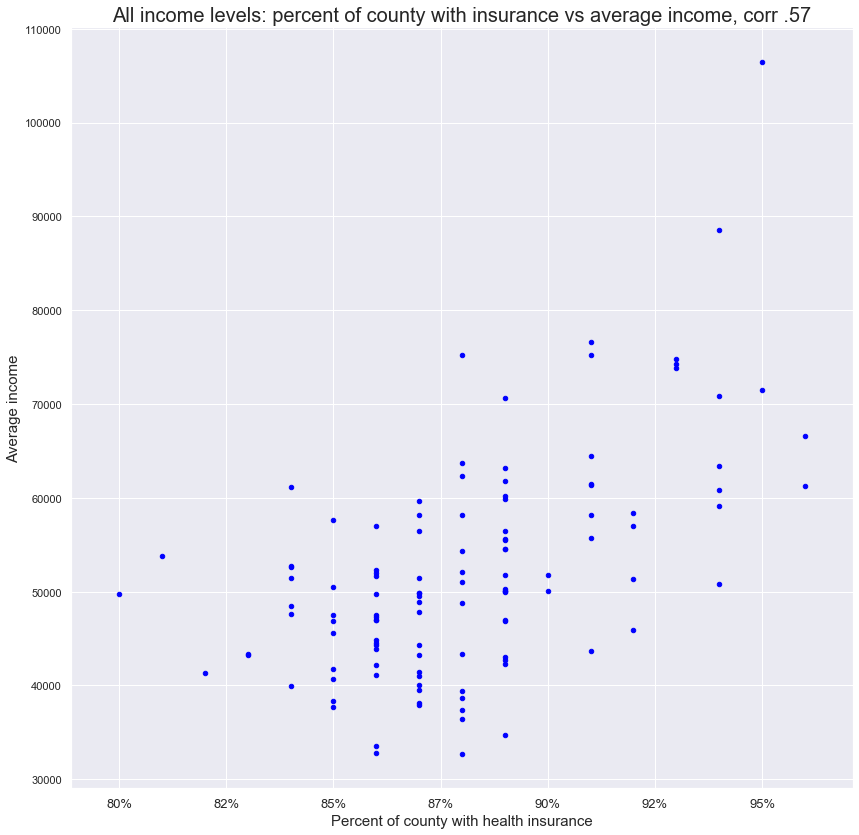

In [174]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], ky_debt_pop_shape_bankruptcy_df_small['avg_income'], color = "blue", s= 20)
plt.xlabel('Percent of county with health insurance', fontsize=15)
plt.ylabel('Average income', fontsize=15)
plt.xticks([.800,.825,.850,.875,.900, .925, .950],["80%","82%","85%","87%","90%","92%", "95%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: percent of county with insurance vs average income, corr .57', fontsize= 20)

#### A strong correlation (.57) exists between avg income and the percent of the county with insurance. 

Text(0.5, 1.0, 'All income levels: percent of county with debt in collections vs percent of county with medical debt in collections, corr .85')

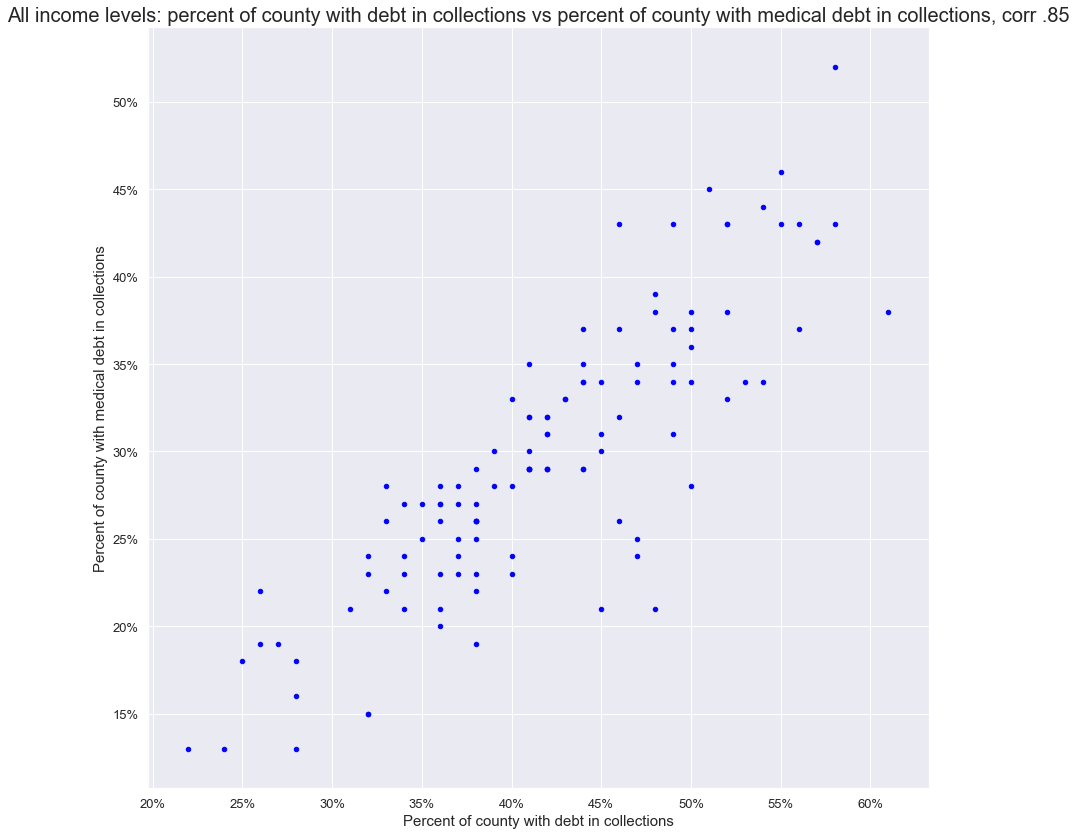

In [173]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_debt_in_coll'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "blue", s= 20)
plt.xlabel('Percent of county with debt in collections', fontsize=15)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.xticks([.20,.25,.30,.35,.40, .45, .50, .55, .60],["20%","25%","30%","35%","40%","45%", "50%", "55%", "60%"], fontsize=13)
plt.yticks([.15,.20,.25,.30,.35, .40, .45, .50],["15%","20%","25%","30%","35%","40%","45%", "50%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: percent of county with debt in collections vs percent of county with medical debt in collections, corr .85', fontsize= 20)

#### So, a significant amount of people who have debt in collections have medical debt in collections.

Text(0.5, 1.0, 'All income levels: percent of county with insurance vs percent of county with medical debt in collections, corr -.39')

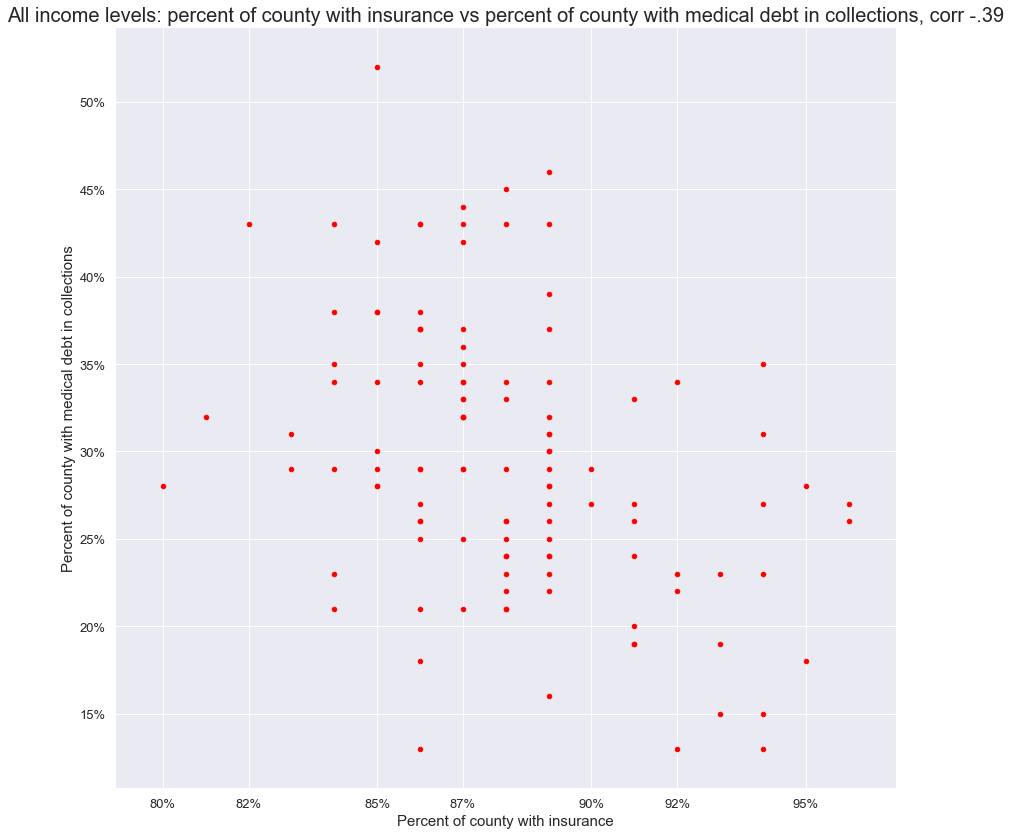

In [176]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "red", s= 20)
plt.xlabel('Percent of county with insurance', fontsize=15)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.xticks([.80,.82,.85,.87,.90, .92, .95],["80%","82%","85%","87%","90%","92%", "95%"], fontsize=13)
plt.yticks([.15,.20,.25,.30,.35, .40, .45, .50],["15%","20%","25%","30%","35%","40%","45%", "50%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: percent of county with insurance vs percent of county with medical debt in collections, corr -.39', fontsize= 20)

#### The above negative correlation between percent of med debt in collections and the percent of county with insurance is -.39. I would expect this number to be higher, i.e. a stronger relationship of the following: as the percent of medical debt in collections decreases, the percent of people with insurance increases. I.e. insurance is a protective factor from unmanageable medical debt. 

Text(0.5, 1.0, 'All income levels: percent of medical debt in collections vs average income, corr -.46')

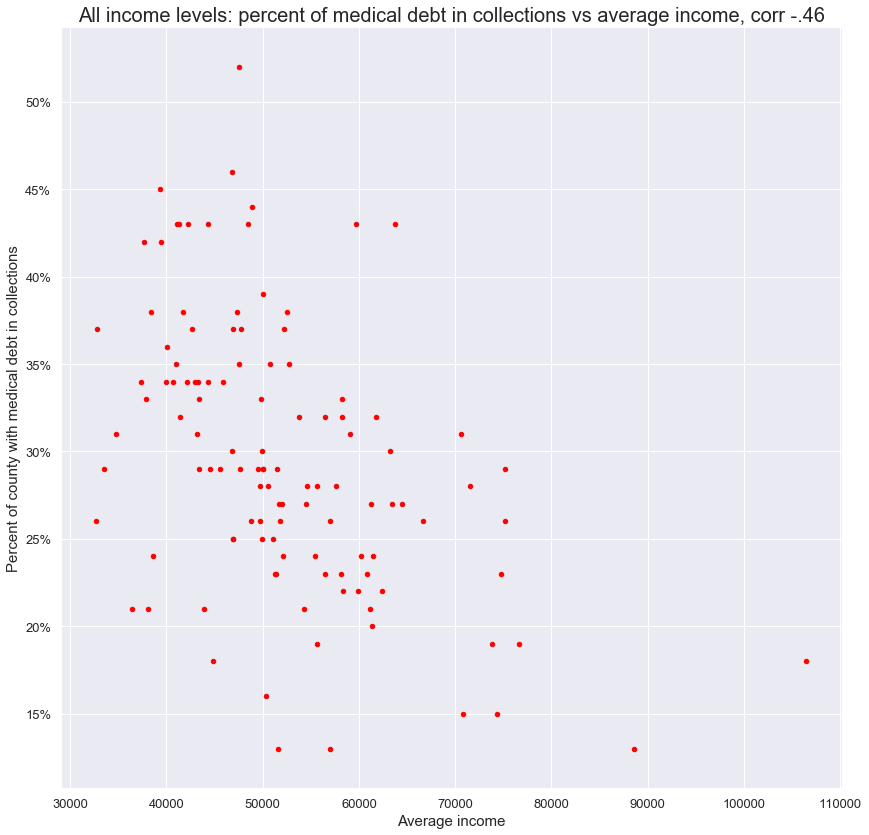

In [178]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['avg_income'], ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], color = "red", s= 20)
plt.xlabel('Average income', fontsize=15)
plt.ylabel('Percent of county with medical debt in collections', fontsize=15)
plt.yticks([.15,.20,.25,.30,.35, .40, .45, .50],["15%","20%","25%","30%","35%","40%","45%", "50%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: percent of medical debt in collections vs average income, corr -.46', fontsize= 20)

#### The above indicates a negative correlation between percent of county with medical debt in collection and average income. I.e. the higher a county's income, the less number of people in that county have medical debt in collections. Makes sense.

Text(0.5, 1.0, 'All income levels Population 2017 vs pct_of county with no insurance -.43')

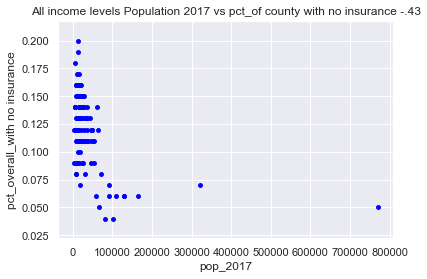

In [50]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pop_2017'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_no_ins'], color = "blue", s= 15)
plt.xlabel('pop_2017')
plt.ylabel('pct_overall_with no insurance')
plt.title('All income levels Population 2017 vs pct_of county with no insurance -.43')

#### now without outiers

(0, 200000)

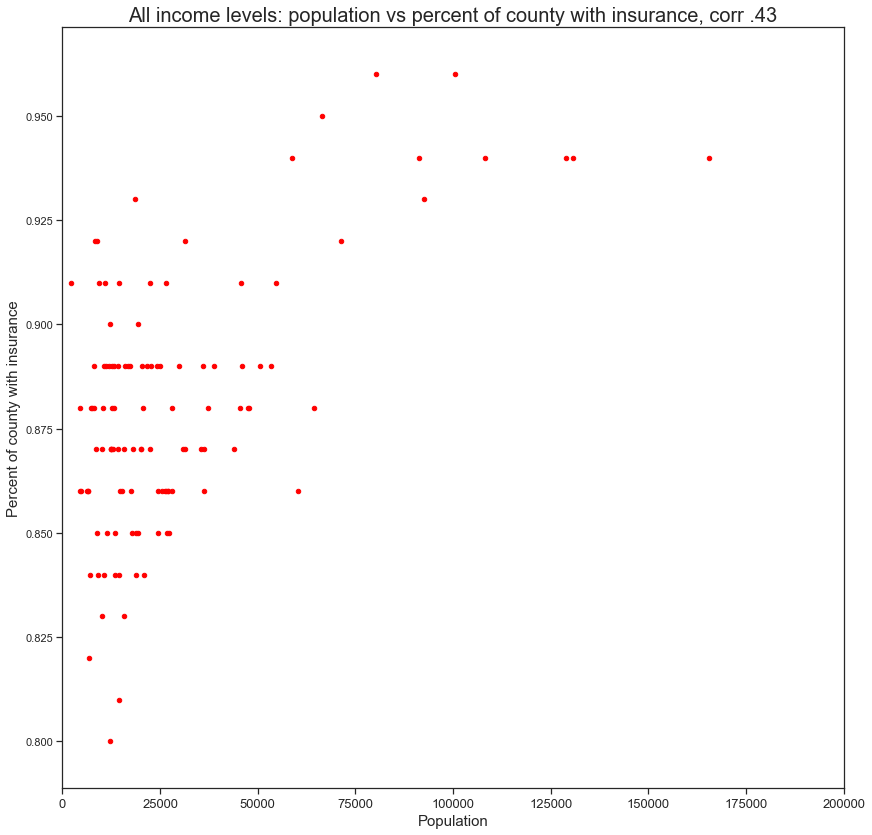

In [187]:
plt.figure(figsize = (14,14))
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pop_2017'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], color = "red", s= 20)
plt.xlabel('Population', fontsize=15)
plt.ylabel('Percent of county with insurance', fontsize=15)
#plt.yticks([.15,.20,.25,.30,.35, .40, .45, .50],["15%","20%","25%","30%","35%","40%","45%", "50%"], fontsize=13)
plt.xticks(fontsize=13)
plt.title('All income levels: population vs percent of county with insurance, corr .43', fontsize= 20)
plt.xlim(0,200000)

#### So there is a moderate negative correlation between the percent of county without insurance and the population, i.e. in more sparsely populated counties you will find more people without insurance. 

Text(0.5, 1.0, 'All income levels Pct of county with medical debt in collection vs pct of personal bankruptcies in the county -.05')

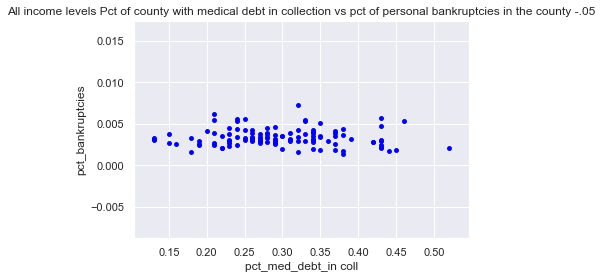

In [52]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['pct_med_debt_in_coll'], ky_debt_pop_shape_bankruptcy_df_small['pct_of_bankruptcies'], color = "blue", s= 15)
plt.xlabel('pct_med_debt_in coll')
plt.ylabel('pct_bankruptcies')
plt.title('All income levels Pct of county with medical debt in collection vs pct of personal bankruptcies in the county -.05')


#### Looking at all income levels, there is no correlation between the percent of the county with medical debt in collections and percent of bankruptcies in a county. 

Text(0.5, 1.0, 'bankruptcies all chapters_non_business vs pct_overall_with_ins .40')

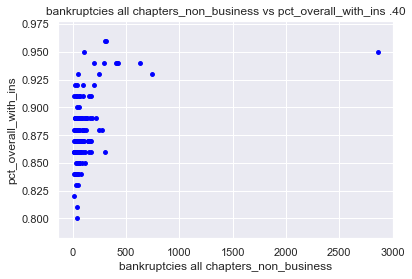

In [53]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['all chapters_non_business'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], color = "blue", s= 15)
plt.xlabel('bankruptcies all chapters_non_business')
plt.ylabel('pct_overall_with_ins')
plt.title('bankruptcies all chapters_non_business vs pct_overall_with_ins .40')

#### now without outiers

(0, 750)

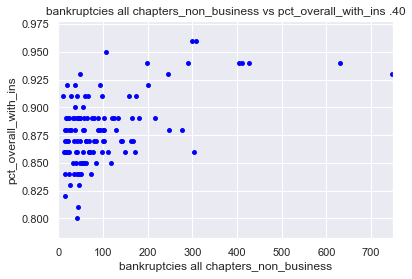

In [54]:
plt.scatter(ky_debt_pop_shape_bankruptcy_df_small['all chapters_non_business'], ky_debt_pop_shape_bankruptcy_df_small['pct_overall_with_ins'], color = "blue", s= 15)
plt.xlabel('bankruptcies all chapters_non_business')
plt.ylabel('pct_overall_with_ins')
plt.title('bankruptcies all chapters_non_business vs pct_overall_with_ins .40')
plt.xlim(0,750)

#### not sure how much I can conclude from the above. There is a moderate correlation between the number of bankruptcies in a county and percentage of people with insurance. This could mean that people with insurance have the money to file for bankruptcy?

### Looking at correlations within low, middle and high income levels

#### First find the income percentiles 

In [55]:
ky_debt_pop_shape_bankruptcy_df_small.describe()

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
count,116.000000,117.000000,116.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.418017,1341.623932,0.295776,654.521368,0.119231,52101.846154,37280.641026,125.880342,81.854701,44.017094,0.880769,0.003349
std,0.082738,354.382068,0.078863,199.455362,0.031600,11755.883341,78667.091107,280.603941,155.011193,127.990165,0.031600,0.001052
min,0.220000,713.000000,0.130000,284.000000,0.040000,32719.000000,2132.000000,9.000000,4.000000,1.000000,0.800000,0.001305
25%,0.360000,1139.000000,0.240000,545.000000,0.110000,43717.000000,12248.000000,38.000000,26.000000,10.000000,0.860000,0.002732
50%,0.410000,1295.000000,0.290000,623.000000,0.120000,50071.000000,19294.000000,61.000000,45.000000,19.000000,0.880000,0.003149
75%,0.480000,1477.000000,0.340000,744.000000,0.140000,58199.000000,35491.000000,120.000000,88.000000,36.000000,0.890000,0.003865
max,0.610000,2905.000000,0.520000,1644.000000,0.200000,106471.000000,770377.000000,2864.000000,1519.000000,1344.000000,0.960000,0.007300


#### create dataframe for low income: below 25% (43717)

In [56]:
bottom_income_ky_debt_pop_shape_bankruptcy_df = ky_debt_pop_shape_bankruptcy_df_small.loc[ky_debt_pop_shape_bankruptcy_df_small.avg_income < 43717] # avg income less than 25%
bottom_income_ky_debt_pop_shape_bankruptcy_df.reset_index(drop=True)

,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
0,Bell,0.56,1030.0,0.37,545.0,0.14,32781,26904.0,69,52,17,0.86,0.002565
1,Breathitt,0.45,916.0,0.21,623.0,0.13,38128,12931.0,80,51,29,0.87,0.006187
2,Butler,0.43,1249.0,0.33,784.0,0.12,43381,12798.0,38,31,7,0.88,0.002969
3,Casey,0.45,787.0,0.31,438.0,0.17,43192,15794.0,47,36,11,0.83,0.002976
4,Clay,0.49,1055.0,0.31,430.0,0.11,34745,20273.0,79,54,25,0.89,0.003897
5,Clinton,0.44,1031.0,0.35,661.0,0.13,41050,10239.0,19,17,2,0.87,0.001856
6,Cumberland,0.46,1087.0,0.43,580.0,0.18,41349,6696.0,14,12,2,0.82,0.002091
7,Elliott,0.51,1295.0,0.45,623.0,0.12,39390,7508.0,14,13,1,0.88,0.001865
8,Estill,0.50,1108.0,0.36,591.0,0.13,40072,14227.0,42,29,13,0.87,0.002952
9,Fulton,0.53,998.0,0.34,623.0,0.14,42169,6204.0,12,5,7,0.86,0.001934


#### find correlation for bottom income group

In [57]:
bottom_income_ky_debt_pop_shape_bankruptcy_df.corr()

bottom_income_ky_debt_pop_shape_bankruptcy_df_corr = bottom_income_ky_debt_pop_shape_bankruptcy_df.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
bottom_income_ky_debt_pop_shape_bankruptcy_df_corr.style.applymap(red)

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
pct_debt_in_coll,1,0.276048,0.547878,0.248498,-0.158789,-0.123807,0.163106,0.0276673,0.0492113,-0.0326825,0.158789,-0.162266
median_debt_in_coll,0.276048,1,0.310892,0.317058,-0.0205826,-0.0276227,-0.119014,-0.0943057,-0.0529938,-0.198297,0.0205826,-0.0486821
pct_med_debt_in_coll,0.547878,0.310892,1,0.175171,0.153208,0.290019,0.0764413,-0.155751,-0.0925942,-0.313808,-0.153208,-0.536638
median_med_debt_in_coll,0.248498,0.317058,0.175171,1,0.00630283,0.084096,-0.138054,-0.151537,-0.134523,-0.185391,-0.00630283,-0.0628263
pct_overall_no_ins,-0.158789,-0.0205826,0.153208,0.00630283,1,0.186157,-0.0451636,-0.0999057,-0.0784651,-0.149818,-1,-0.181088
avg_income,-0.123807,-0.0276227,0.290019,0.084096,0.186157,1,-0.167773,-0.155605,-0.131636,-0.207908,-0.186157,-0.23004
pop_2017,0.163106,-0.119014,0.0764413,-0.138054,-0.0451636,-0.167773,1,0.86169,0.880298,0.742854,0.0451636,0.414445
all chapters_non_business,0.0276673,-0.0943057,-0.155751,-0.151537,-0.0999057,-0.155605,0.86169,1,0.992174,0.9415,0.0999057,0.774534
non_business_chapter_7,0.0492113,-0.0529938,-0.0925942,-0.134523,-0.0784651,-0.131636,0.880298,0.992174,1,0.892049,0.0784651,0.720712
non_business_chapter_13,-0.0326825,-0.198297,-0.313808,-0.185391,-0.149818,-0.207908,0.742854,0.9415,0.892049,1,0.149818,0.858125


Text(0.5, 1.0, 'Lower income level less than 43717: income level pct_debt_in_coll vs pct_med_debt_in_coll corr .54')

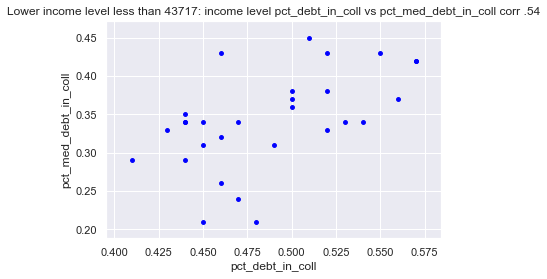

In [58]:
plt.scatter(bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_debt_in_coll'], bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Lower income level less than 43717: income level pct_debt_in_coll vs pct_med_debt_in_coll corr .54')

#### Relative to all income levells, with lower income segment, there is a weaker correlation between percent of the county with debt in collections and percent with medical debt in collections. 

Text(0.5, 1.0, 'Low income level pct_overall_with_ins vs pct_med_debt_in_coll corr -.15')

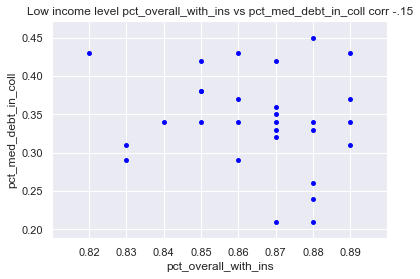

In [59]:
plt.scatter(bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Low income level pct_overall_with_ins vs pct_med_debt_in_coll corr -.15')

#### According to the above, for lower income segment, there is no correlation between the percent of the county with insurance and the percent of the county with medical debt in collections. This is different from overall where you see  a -.39

(0, 0.01)

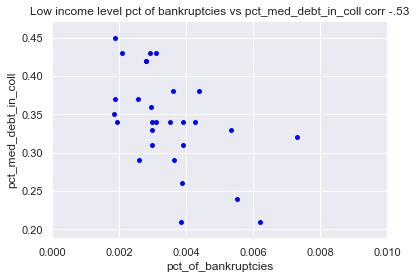

In [60]:
plt.scatter(bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], bottom_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_of_bankruptcies')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Low income level pct of bankruptcies vs pct_med_debt_in_coll corr -.53')
plt.xlim(0,.01)

#### According to the above, for lower income segment, there is a moderate negative correlation between the percentage of bankruptcies in a county and the percent of the coutny with medical debt in collections. Possibly because lower income levels are less likely to have the money to file for bankruptcy. This is different from all income levels where there was no correlation between the percent of the county with medical debt in collections and percent of bankruptcies in a county.

### A look at middle incomes

In [61]:
middle_income_ky_debt_pop_shape_bankruptcy_df = ky_debt_pop_shape_bankruptcy_df_small[(ky_debt_pop_shape_bankruptcy_df_small.avg_income >= 43717) & (ky_debt_pop_shape_bankruptcy_df_small.avg_income < 58199)] # avg income between 25% and 75%
middle_income_ky_debt_pop_shape_bankruptcy_df.reset_index(drop=True)


,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
0,Adair,0.41,1636.0,0.29,767.0,0.15,45573,19294.0,58,48,10,0.85,0.003006
1,Allen,0.41,2198.0,0.35,1200.0,0.16,52779,20921.0,73,55,18,0.84,0.003489
2,Ballard,0.32,1295.0,0.23,623.0,0.12,58182,8021.0,24,14,10,0.88,0.002992
3,Barren,0.41,1477.0,0.29,781.0,0.13,49555,43815.0,139,98,41,0.87,0.003172
4,Bath,0.54,1012.0,0.44,466.0,0.13,48853,12378.0,21,14,7,0.87,0.001697
5,Boyle,0.40,1208.0,0.23,321.0,0.11,56462,29958.0,89,66,23,0.89,0.002971
6,Bracken,0.34,1727.0,0.23,623.0,0.08,51316,8277.0,37,18,19,0.92,0.004470
7,Breckinridge,0.42,1333.0,0.29,472.0,0.13,51480,20151.0,61,45,16,0.87,0.003027
8,Caldwell,0.41,1677.0,0.29,642.0,0.11,50042,12677.0,35,23,12,0.89,0.002761
9,Calloway,0.28,922.0,0.16,680.0,0.11,50310,38865.0,101,73,28,0.89,0.002599


In [62]:
middle_income_ky_debt_pop_shape_bankruptcy_df.corr()
middle_income_ky_debt_pop_shape_bankruptcy_df_corr = middle_income_ky_debt_pop_shape_bankruptcy_df.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
middle_income_ky_debt_pop_shape_bankruptcy_df_corr.style.applymap(red)

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
pct_debt_in_coll,1,-0.0380561,0.891915,-0.00608768,0.198042,-0.34949,0.133469,0.154531,0.180482,0.0622455,-0.198042,0.127462
median_debt_in_coll,-0.0380561,1,0.0748671,0.583909,0.0719249,0.206727,-0.0502322,-0.0805991,-0.0581566,-0.115519,-0.0719249,-0.103639
pct_med_debt_in_coll,0.891915,0.0748671,1,0.103314,0.225666,-0.358066,0.103112,0.0922469,0.135173,-0.0258573,-0.225666,0.0377061
median_med_debt_in_coll,-0.00608768,0.583909,0.103314,1,0.0693067,0.0130505,0.0291902,-0.0310001,0.00912936,-0.116932,-0.0693067,-0.105317
pct_overall_no_ins,0.198042,0.0719249,0.225666,0.0693067,1,-0.138859,-0.272431,-0.198243,-0.152753,-0.261783,-1,-0.0217156
avg_income,-0.34949,0.206727,-0.358066,0.0130505,-0.138859,1,-0.14388,-0.148324,-0.157592,-0.0961886,0.138859,-0.16225
pop_2017,0.133469,-0.0502322,0.103112,0.0291902,-0.272431,-0.14388,1,0.910447,0.885617,0.778529,0.272431,0.169022
all chapters_non_business,0.154531,-0.0805991,0.0922469,-0.0310001,-0.198243,-0.148324,0.910447,1,0.973869,0.85248,0.198243,0.495852
non_business_chapter_7,0.180482,-0.0581566,0.135173,0.00912936,-0.152753,-0.157592,0.885617,0.973869,1,0.711479,0.152753,0.45276
non_business_chapter_13,0.0622455,-0.115519,-0.0258573,-0.116932,-0.261783,-0.0961886,0.778529,0.85248,0.711479,1,0.261783,0.492068


Text(0.5, 1.0, 'Mid income level pct of people with debt in collections vs pct of people with medical debt in collections .89')

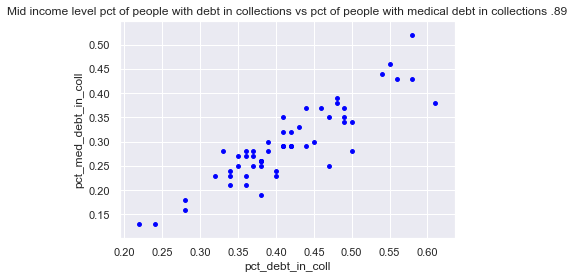

In [63]:
plt.scatter(middle_income_ky_debt_pop_shape_bankruptcy_df['pct_debt_in_coll'], middle_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Mid income level pct of people with debt in collections vs pct of people with medical debt in collections .89')

#### Within the middle income group, there is a stronger correlation compared to the low income group, between percent of people with debt in collections and the percent of people with medical debt in collections. 

Text(0.5, 1.0, 'Mid income level pct of people with insurance vs pct of people with medical debt in collections -.22')

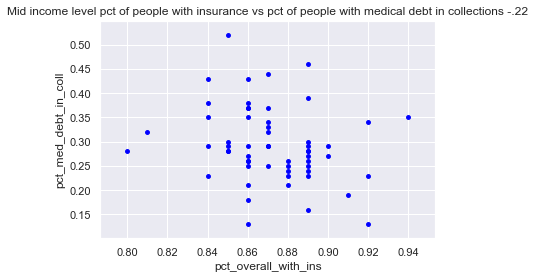

In [64]:
plt.scatter(middle_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], middle_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Mid income level pct of people with insurance vs pct of people with medical debt in collections -.22')

#### Similar to the low income group (-.39 corr), there is no correlation between the percent of people with insurance and the percent of people with medical debt in collections (-.22).

Text(0.5, 1.0, 'Mid income level pct of bankruptcies vs pct of people with medical debt in collections -.03')

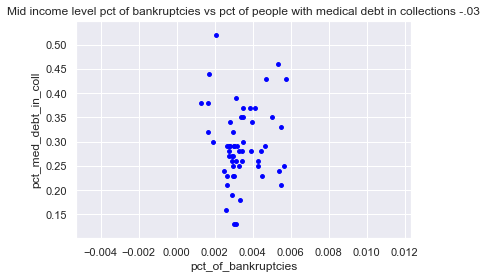

In [65]:
plt.scatter(middle_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], middle_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_of_bankruptcies')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Mid income level pct of bankruptcies vs pct of people with medical debt in collections -.03')

#### This is interesting. Why at lower income level, the percent of bankruptcies and the percent of medical debt in collections, there a negative orrelation (-.53) but at the middle income levels, there is no correlation (-.03). Why?

### A look at top incomes

In [66]:
top_income_ky_debt_pop_shape_bankruptcy_df = ky_debt_pop_shape_bankruptcy_df_small.loc[ky_debt_pop_shape_bankruptcy_df_small.avg_income > 58199] # avg income above 75%
top_income_ky_debt_pop_shape_bankruptcy_df.reset_index(drop=True)


,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
0,Anderson,0.32,1119.0,0.24,744.0,0.09,61426,22518.0,98,49,49,0.91,0.004352
1,Boone,0.28,1410.0,0.13,390.0,0.06,88538,130611.0,427,257,170,0.94,0.003269
2,Boyd,0.52,1708.0,0.43,790.0,0.12,63743,47759.0,103,71,32,0.88,0.002157
3,Bullitt,0.36,1320.0,0.27,674.0,0.04,61222,80284.0,298,176,122,0.96,0.003712
4,Campbell,0.32,1099.0,0.15,519.0,0.07,74290,92547.0,245,152,93,0.93,0.002647
5,Clark,0.41,1363.0,0.30,656.0,0.11,63223,35940.0,125,92,33,0.89,0.003478
6,Daviess,0.33,1444.0,0.26,593.0,0.04,66638,100546.0,309,223,86,0.96,0.003073
7,Fayette,0.37,1182.0,0.23,655.0,0.07,74766,322193.0,746,518,228,0.93,0.002315
8,Franklin,0.42,1605.0,0.32,741.0,0.11,61784,50504.0,216,121,95,0.89,0.004277
9,Greenup,0.49,1681.0,0.43,875.0,0.13,59689,35491.0,85,63,22,0.87,0.002395


In [67]:
top_income_ky_debt_pop_shape_bankruptcy_df.corr()
top_income_ky_debt_pop_shape_bankruptcy_df_corr = top_income_ky_debt_pop_shape_bankruptcy_df.corr()
def red(val):
    color = 'red' if val >= .4 or val <= -.4 else 'black'
    return 'color: %s' % color
top_income_ky_debt_pop_shape_bankruptcy_df_corr.style.applymap(red)

,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies
pct_debt_in_coll,1,0.522487,0.870051,0.671061,0.354321,-0.470272,0.11502,0.121359,0.133573,0.10558,-0.354321,0.208808
median_debt_in_coll,0.522487,1,0.508569,0.608385,0.18679,-0.125423,0.0653899,0.070244,0.0858969,0.0511052,-0.18679,-0.0836839
pct_med_debt_in_coll,0.870051,0.508569,1,0.719199,0.367612,-0.44782,-0.0209265,-0.00988325,-0.0129926,-0.00619119,-0.367612,0.0181193
median_med_debt_in_coll,0.671061,0.608385,0.719199,1,0.251875,-0.397681,0.110972,0.120412,0.114491,0.12578,-0.251875,0.188811
pct_overall_no_ins,0.354321,0.18679,0.367612,0.251875,1,-0.347735,-0.424009,-0.406251,-0.439582,-0.362388,-1,-0.145087
avg_income,-0.470272,-0.125423,-0.44782,-0.397681,-0.347735,1,0.189708,0.131558,0.128379,0.133682,0.347735,-0.391216
pop_2017,0.11502,0.0653899,-0.0209265,0.110972,-0.424009,0.189708,1,0.987178,0.99285,0.968334,0.424009,0.131161
all chapters_non_business,0.121359,0.070244,-0.00988325,0.120412,-0.406251,0.131558,0.987178,1,0.995096,0.993328,0.406251,0.213658
non_business_chapter_7,0.133573,0.0858969,-0.0129926,0.114491,-0.439582,0.128379,0.99285,0.995096,1,0.977049,0.439582,0.206591
non_business_chapter_13,0.10558,0.0511052,-0.00619119,0.12578,-0.362388,0.133682,0.968334,0.993328,0.977049,1,0.362388,0.21929


Text(0.5, 1.0, 'Top income level pct of county with debt in collections vs pct of county with medical debt in collections .87')

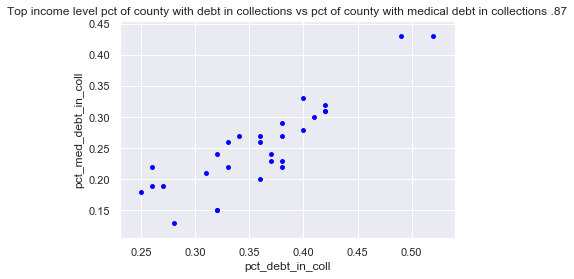

In [68]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_debt_in_coll'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_debt_in_coll')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Top income level pct of county with debt in collections vs pct of county with medical debt in collections .87')

#### Within the top income group, there is a strong correlation between percent of people with debt in collections and the percent of people with medical debt in collections (.87). This strong correlation is consistent across income groups. 

Text(0.5, 1.0, 'Top income level pct of county with insurance vs pct of county with medical debt in collections -.36')

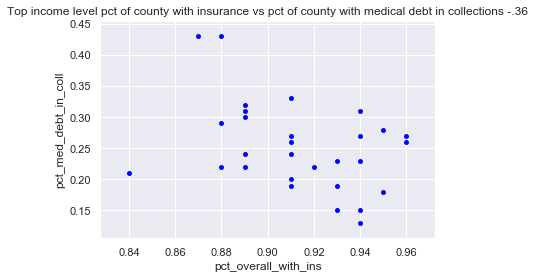

In [69]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_med_debt_in_coll')
plt.title('Top income level pct of county with insurance vs pct of county with medical debt in collections -.36')

#### The low income group (-.15 corr) has no/low correlation compared to the middle income group (-.39 corr), and the high income group (-.36).

Text(0.5, 1.0, 'Top income level pct of county with insurance vs pct of personal bankruptcies in county .14')

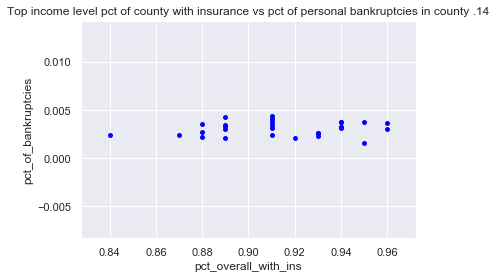

In [70]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_overall_with_ins'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], color = "blue", s= 15)
plt.xlabel('pct_overall_with_ins')
plt.ylabel('pct_of_bankruptcies')
plt.title('Top income level pct of county with insurance vs pct of personal bankruptcies in county .14')


#### At top income level there is no correlation between the percent ofthe county with insurance and the percent of bankruptcies in the county. 

Text(0.5, 1.0, 'Top income level pct of bankruptcies in coutny vs pct of medical debt in collections .01')

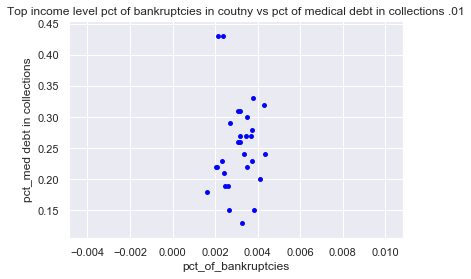

In [71]:
plt.scatter(top_income_ky_debt_pop_shape_bankruptcy_df['pct_of_bankruptcies'], top_income_ky_debt_pop_shape_bankruptcy_df['pct_med_debt_in_coll'], color = "blue", s= 15)
plt.xlabel('pct_of_bankruptcies')
plt.ylabel('pct_med debt in collections')
plt.title('Top income level pct of bankruptcies in coutny vs pct of medical debt in collections .01')

#### At top income level there is no correlation between the percent of bankruptcies and the percent ofmedical debt in collections in the county.





#### Looking again at the overall df, adding a column for the income groups

In [72]:
    # Create a function to assign income groups
    income_group = []
    for row in ky_debt_pop_shape_bankruptcy_df_small['avg_income']:
        if row < 43717:    income_group.append('low_income')
        elif row >= 43717 and row < 58199:  income_group.append('middle_income')
        else:           income_group.append('high_income')
    # Create a column from the list
    ky_debt_pop_shape_bankruptcy_df_small['income_group'] = income_group
    
ky_debt_pop_shape_bankruptcy_df_small.head()

,County,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_overall_no_ins,avg_income,pop_2017,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,pct_overall_with_ins,pct_of_bankruptcies,income_group
0,Adair,0.41,1636.0,0.29,767.0,0.15,45573,19294.0,58,48,10,0.85,0.003006,middle_income
1,Allen,0.41,2198.0,0.35,1200.0,0.16,52779,20921.0,73,55,18,0.84,0.003489,middle_income
2,Anderson,0.32,1119.0,0.24,744.0,0.09,61426,22518.0,98,49,49,0.91,0.004352,high_income
3,Ballard,0.32,1295.0,0.23,623.0,0.12,58182,8021.0,24,14,10,0.88,0.002992,middle_income
4,Barren,0.41,1477.0,0.29,781.0,0.13,49555,43815.0,139,98,41,0.87,0.003172,middle_income


Text(0.5, 1, 'High income more than 58,199, corr .87')

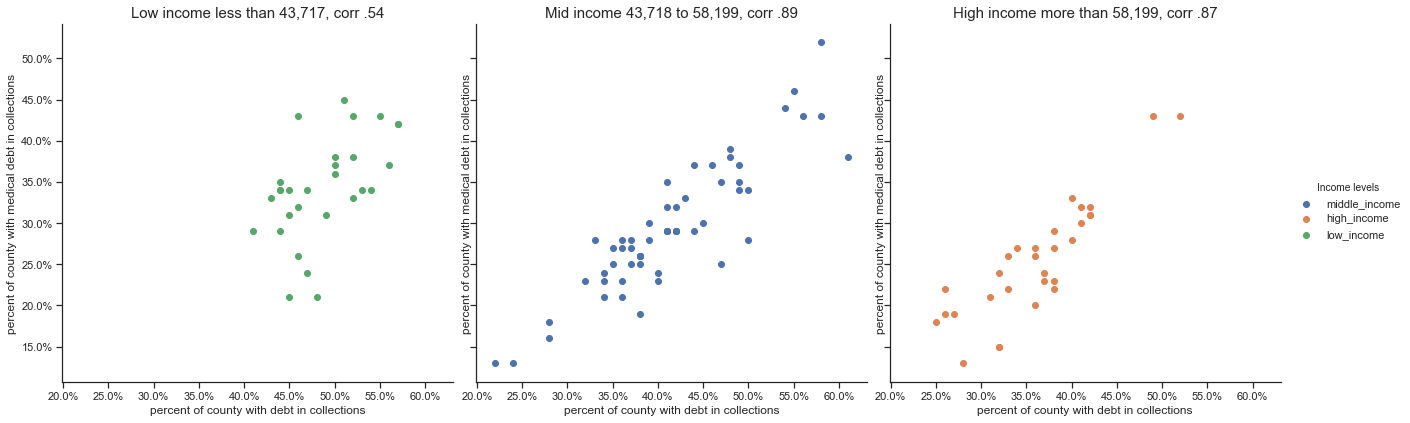

In [196]:
sns.set(style='ticks', rc={'figure.figsize':(11.7,8.27)})
grid1 = sns.FacetGrid(ky_debt_pop_shape_bankruptcy_df_small, col='income_group', hue='income_group', col_wrap=3, size=6, aspect=1, col_order=["low_income", "middle_income", "high_income"])
grid1.map(plt.scatter, 'pct_debt_in_coll','pct_med_debt_in_coll')
grid1.add_legend(ncol=1, title= 'Income levels')
grid1.set(xlabel='percent of county with debt in collections', ylabel='percent of county with medical debt in collections')


for ax in grid1.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_formatter(PercentFormatter(1))


axes = grid1.axes.flatten()
axes[0].set_title("Low income less than 43,717, corr .54", fontsize=15)
axes[1].set_title("Mid income 43,718 to 58,199, corr .89", fontsize=15)
axes[2].set_title("High income more than 58,199, corr .87", fontsize=15)

Text(0.5, 1, 'High income more than 58,199, corr -.36')

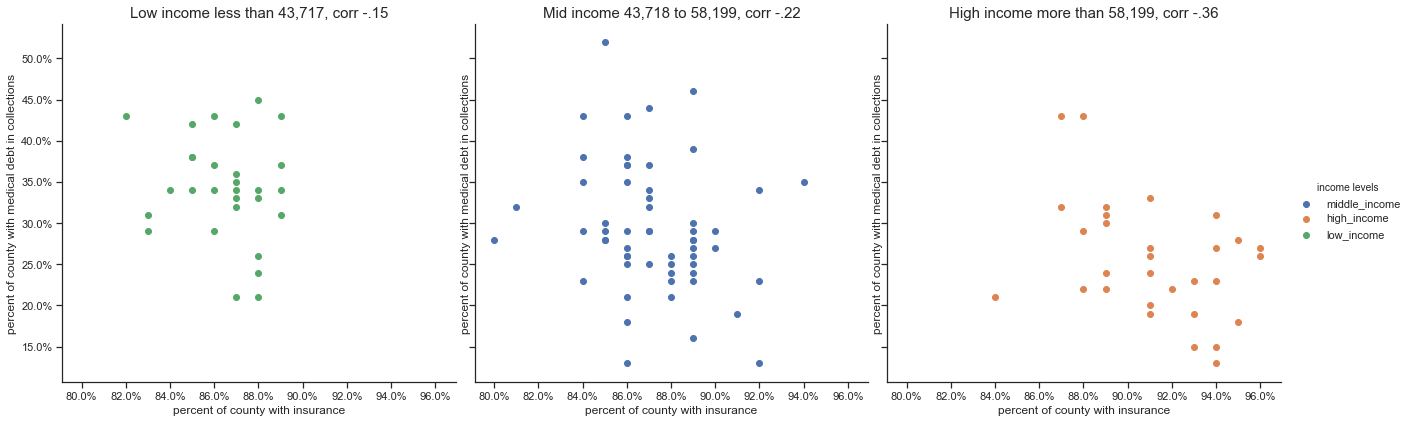

In [200]:
sns.set(style='ticks')
grid1 = sns.FacetGrid(ky_debt_pop_shape_bankruptcy_df_small, col='income_group', hue='income_group', col_wrap=3, height=7, size=6, aspect=1, col_order=["low_income", "middle_income", "high_income"])
grid1.map(plt.scatter, 'pct_overall_with_ins','pct_med_debt_in_coll')
grid1.add_legend(ncol=1, title= 'income levels')
grid1.set(xlabel='percent of county with insurance', ylabel='percent of county with medical debt in collections')

from matplotlib.ticker import PercentFormatter

for ax in grid1.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_formatter(PercentFormatter(1))


axes = grid1.axes.flatten()
axes[0].set_title("Low income less than 43,717, corr -.15", fontsize=15)
axes[1].set_title("Mid income 43,718 to 58,199, corr -.22", fontsize=15)
axes[2].set_title("High income more than 58,199, corr -.36", fontsize=15)

Text(0.5, 1, 'High income more than 58,199, corr .01')

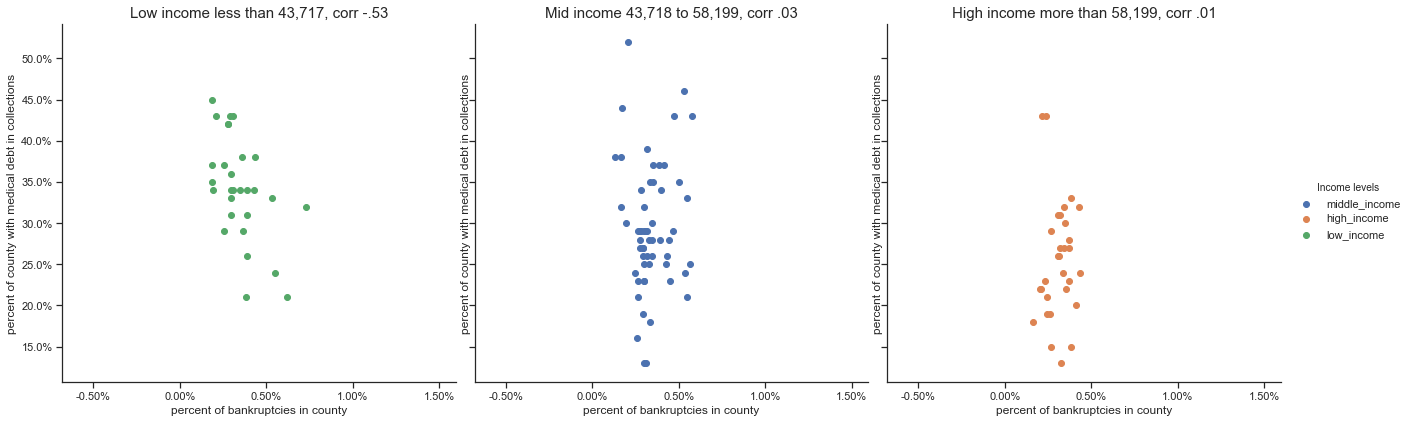

In [204]:
sns.set(style='ticks')
grid1 = sns.FacetGrid(ky_debt_pop_shape_bankruptcy_df_small, col='income_group', hue='income_group', col_wrap=3, size=6, aspect=1, col_order=["low_income", "middle_income", "high_income"])
grid1.map(plt.scatter, 'pct_of_bankruptcies','pct_med_debt_in_coll')
grid1.add_legend(ncol=1, title= 'Income levels')
grid1.set(xlabel='percent of bankruptcies in county', ylabel='percent of county with medical debt in collections')

from matplotlib.ticker import PercentFormatter

for ax in grid1.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_formatter(PercentFormatter(1))


axes = grid1.axes.flatten()
axes[0].set_title("Low income less than 43,717, corr -.53", fontsize=15)
axes[1].set_title("Mid income 43,718 to 58,199, corr .03", fontsize=15)
axes[2].set_title("High income more than 58,199, corr .01", fontsize=15)

### Making the choropleth map

In [76]:
merged_json = json.loads(ky_debt_pop_shape_bankruptcy_df_small.to_json())

In [77]:
json_data = json.dumps(merged_json)

In [78]:
geosource = GeoJSONDataSource(geojson = json_data)

In [79]:
palette = brewer['YlGnBu'][8]

In [80]:
palette = palette[::-1]

In [81]:
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)

In [82]:
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

In [83]:
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

In [84]:
p = figure(title = 'Share of counties with medical debt in collections', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

In [85]:
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

GlyphRenderer(id='1041', ...)

In [86]:
p.add_layout(color_bar, 'below')

In [87]:
output_notebook()

Loading BokehJS ...

In [88]:
show(p)

### Failed attempt with bokeh above. Below I shall try with plotly

In [89]:
ky_county_map_fips_df = pd.read_excel('./data/KY_FIPS.xlsx')
ky_county_map_fips_df.head()

,FIPS,County,State
0,21001,Adair,KY
1,21003,Allen,KY
2,21005,Anderson,KY
3,21007,Ballard,KY
4,21009,Barren,KY


In [90]:
ky_county_map_fips_df_r = ky_county_map_fips_df[ky_county_map_fips_df['State'] == 'KY']

In [91]:
ky_debt_pop_shape_bankruptcy_fips_df = pd.merge(ky_debt_pop_shape_bankruptcy_df,ky_county_map_fips_df_r, on=['County'], how ='inner')
ky_debt_pop_shape_bankruptcy_fips_df


,County,State_x,pct_debt_in_coll,median_debt_in_coll,pct_med_debt_in_coll,median_med_debt_in_coll,pct_pop_nonwhite,pct_overall_no_ins,pct_white_no_ins,pct_nonwhite_no_ins,avg_income,avg_income_white,avg_income_nonwhite,pop_2017,geometry,all chapters_non_business,non_business_chapter_7,non_business_chapter_13,FIPS,State_y
0,Adair,Kentucky,0.41,1636.0,0.29,767.0,0.06,0.15,0.14,0.27,45573,45942,38559,19294.0,"POLYGON ((5091332.504490286 3637133.24552922, ...",58,48,10,21001,KY
1,Allen,Kentucky,0.41,2198.0,0.35,1200.0,0.04,0.16,0.16,0.28,52779,51598,88920,20921.0,"POLYGON ((4807035.996361256 3493719.995950386,...",73,55,18,21003,KY
2,Anderson,Kentucky,0.32,1119.0,0.24,744.0,0.06,0.09,0.09,0.06,61426,61528,58865,22518.0,"POLYGON ((5130153.999390408 3935494.758557647,...",98,49,49,21005,KY
3,Ballard,Kentucky,0.32,1295.0,0.23,623.0,0.07,0.12,0.12,0.21,58182,59729,30831,8021.0,"POLYGON ((4025485.747941986 3521587.750047788,...",24,14,10,21007,KY
4,Barren,Kentucky,0.41,1477.0,0.29,781.0,0.09,0.13,0.13,0.15,49555,50043,43486,43815.0,"POLYGON ((4922934.002443656 3585414.001578286,...",139,98,41,21009,KY
5,Bath,Kentucky,0.54,1012.0,0.44,466.0,0.04,0.13,0.13,0.20,48853,49679,25529,12378.0,"POLYGON ((5430491.508193895 3962484.247567341,...",21,14,7,21011,KY
6,Bell,Kentucky,0.56,1030.0,0.37,545.0,0.05,0.14,0.14,0.12,32781,33003,28357,26904.0,"POLYGON ((5576158.994258568 3509058.496607304,...",69,52,17,21013,KY
7,Boone,Kentucky,0.28,1410.0,0.13,390.0,0.11,0.06,0.04,0.22,88538,87799,96049,130611.0,"POLYGON ((5241034.008138925 4280889.491656229,...",427,257,170,21015,KY
8,Bourbon,Kentucky,0.41,1248.0,0.32,592.0,0.15,0.13,0.11,0.25,58199,60702,39777,20132.0,"POLYGON ((5326891.997147262 3998090.497022852,...",69,45,24,21017,KY
9,Boyd,Kentucky,0.52,1708.0,0.43,790.0,0.06,0.12,0.11,0.26,63743,62881,88023,47759.0,"POLYGON ((5761807.492436513 4037066.25689292, ...",103,71,32,21019,KY


In [92]:
ky_debt_pop_shape_bankruptcy_fips_df_small =ky_debt_pop_shape_bankruptcy_fips_df[['FIPS','County', 'pct_med_debt_in_coll',
                                 'median_med_debt_in_coll', 'State_x', 'pct_overall_no_ins', 'avg_income', 'pop_2017']] 

ky_debt_pop_shape_bankruptcy_fips_df_small
                                                                         

,FIPS,County,pct_med_debt_in_coll,median_med_debt_in_coll,State_x,pct_overall_no_ins,avg_income,pop_2017
0,21001,Adair,0.29,767.0,Kentucky,0.15,45573,19294.0
1,21003,Allen,0.35,1200.0,Kentucky,0.16,52779,20921.0
2,21005,Anderson,0.24,744.0,Kentucky,0.09,61426,22518.0
3,21007,Ballard,0.23,623.0,Kentucky,0.12,58182,8021.0
4,21009,Barren,0.29,781.0,Kentucky,0.13,49555,43815.0
5,21011,Bath,0.44,466.0,Kentucky,0.13,48853,12378.0
6,21013,Bell,0.37,545.0,Kentucky,0.14,32781,26904.0
7,21015,Boone,0.13,390.0,Kentucky,0.06,88538,130611.0
8,21017,Bourbon,0.32,592.0,Kentucky,0.13,58199,20132.0
9,21019,Boyd,0.43,790.0,Kentucky,0.12,63743,47759.0


In [99]:
values = ky_debt_pop_shape_bankruptcy_fips_df_small['pct_med_debt_in_coll'].tolist()


fips = ky_debt_pop_shape_bankruptcy_fips_df_small['FIPS'].tolist()


In [100]:
#endpts = list(np.mgrid[min(values):max(values)])

In [206]:
fig = ff.create_choropleth(fips=fips, values=values, scope=['Kentucky'], county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, show_state_data=True,
    show_hover=True, centroid_marker={'opacity': 0}, legend_title='Percent of county with medical debt in collections')

fig.update_layout(
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'})

fig.layout.template = None
fig.show()

In [207]:
ky_debt_pop_shape_bankruptcy_df_small.to_excel("ky_debt_pop_shape_bankruptcy_df_small.xlsx")